<a href="https://colab.research.google.com/github/joeljacson/machine-learning/blob/main/Electric_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle (11).json to kaggle (11).json


{'kaggle (11).json': b'{"username":"joeljacsonjamesgopi","key":"abc4369d822a95d7ecfcd4eb0d3dad56"}'}

In [ ]:
import os

# Check if the kaggle.json file is in the current directory
if 'kaggle.json' not in os.listdir():
    print("Please make sure you have uploaded the kaggle.json file.")
else:
    # Set up Kaggle API token
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json


Please make sure you have uploaded the kaggle.json file.


In [ ]:
!kaggle datasets download -d fatihilhan/electric-vehicle-specifications-and-prices

Dataset URL: https://www.kaggle.com/datasets/fatihilhan/electric-vehicle-specifications-and-prices
License(s): other
  0% 0.00/10.3k [00:00<?, ?B/s]
100% 10.3k/10.3k [00:00<00:00, 16.8MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('/content/electric-vehicle-specifications-and-prices.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')
    zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/EV_cars.csv')
df.head()

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


In [ ]:
import pandas as pd
import zipfile

# Unzip the downloaded dataset
with zipfile.ZipFile("electric-vehicle-specifications-and-prices.zip", 'r') as zip_ref:
    zip_ref.extractall("ev_data")

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("/content/EV_cars.csv")


In [ ]:
# Get an overview of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)


   Battery                             Car_name  \
0     75.0  Tesla Model Y Long Range Dual Motor   
1     57.5                        Tesla Model 3   
2     60.5                           BYD ATTO 3   
3     61.7               MG MG4 Electric 64 kWh   
4     75.0  Tesla Model 3 Long Range Dual Motor   

                                       Car_name_link  Efficiency  Fast_charge  \
0  https://ev-database.org/car/1619/Tesla-Model-Y...         172        670.0   
1     https://ev-database.org/car/1991/Tesla-Model-3         137        700.0   
2        https://ev-database.org/car/1782/BYD-ATTO-3         183        370.0   
3  https://ev-database.org/car/1708/MG-MG4-Electr...         171        630.0   
4  https://ev-database.org/car/1992/Tesla-Model-3...         149        780.0   

   Price.DE.  Range  Top_speed  acceleration..0.100.  
0    59017.0    435        217                   5.0  
1    46220.0    420        201                   6.1  
2    44625.0    330        160           

In [ ]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Fill missing values for numeric columns with the mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values for categorical columns with a placeholder
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# Convert categorical variables to numerical
df = pd.get_dummies(df, drop_first=True)

# Scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)


In [ ]:
print(df.columns)


Index(['Battery', 'Efficiency', 'Fast_charge', 'Price.DE.', 'Range',
       'Top_speed', 'acceleration..0.100.', 'Car_name_Abarth 500e Hatchback',
       'Car_name_Aiways U5', 'Car_name_Aiways U6',
       ...
       'Car_name_link_https://ev-database.org/car/2038/Ford-Mustang-Mach-E-GT',
       'Car_name_link_https://ev-database.org/car/2039/Citroen-e-C3',
       'Car_name_link_https://ev-database.org/car/2040/BMW-iX2-xDrive30',
       'Car_name_link_https://ev-database.org/car/2041/Smart-1-Pro',
       'Car_name_link_https://ev-database.org/car/2042/Nissan-Townstar-EV-Passenger',
       'Car_name_link_https://ev-database.org/car/2044/Hyundai-IONIQ-5-N',
       'Car_name_link_https://ev-database.org/car/2045/Mercedes-EQE-SUV-300',
       'Car_name_link_https://ev-database.org/car/2046/Mercedes-EQE-SUV-350plus',
       'Car_name_link_https://ev-database.org/car/2047/Mercedes-EQE-SUV-350-4MATIC',
       'Car_name_link_https://ev-database.org/car/2048/Mercedes-EQE-SUV-500-4MATIC'],
      

In [ ]:
target_variable = 'battery_capacity'  # Use the correct name based on your dataset


In [ ]:
# Assuming you find that the correct column name is 'Range' without extra spaces
target_variable = 'Range'  # Replace with the correct name you find

# Split the features and target variable
X = df.drop(target_variable, axis=1)
y = df[target_variable]


In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
target_variable = 'Range'  # Adjust based on the corrected column name

# Split the features and target variable
X = df.drop(target_variable, axis=1)
y = df[target_variable]


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 11.857638888888888
Mean Squared Error: 326.82093749999996
R² Score: 0.9689179940082959


In [ ]:
# Example new data (replace with actual data)
new_data = X_test.iloc[0].values.reshape(1, -1)

# Predict using the trained model
predicted_value = model.predict(new_data)

print(f"Predicted Value: {predicted_value}")


Predicted Value: [315.4]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importance
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


                                               Feature  Importance
0                                              Battery    0.773577
1                                           Efficiency    0.081928
2                                          Fast_charge    0.058423
4                                            Top_speed    0.057586
5                                 acceleration..0.100.    0.017529
..                                                 ...         ...
496  Car_name_link_https://ev-database.org/car/1707...    0.000000
497  Car_name_link_https://ev-database.org/car/1708...    0.000000
221              Car_name_Opel Vivaro-e Combi L 75 kWh    0.000000
220              Car_name_Opel Vivaro-e Combi L 50 kWh    0.000000
357  Car_name_link_https://ev-database.org/car/1164...    0.000000

[715 rows x 2 columns]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get best parameters
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

print(f"Cross-Validation Scores: {-cv_scores}")
print(f"Mean CV Score: {-cv_scores.mean()}")


Cross-Validation Scores: [541.10263889 354.73836806 258.70315972 290.00513889 664.0053125 ]
Mean CV Score: 421.7109236111111


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

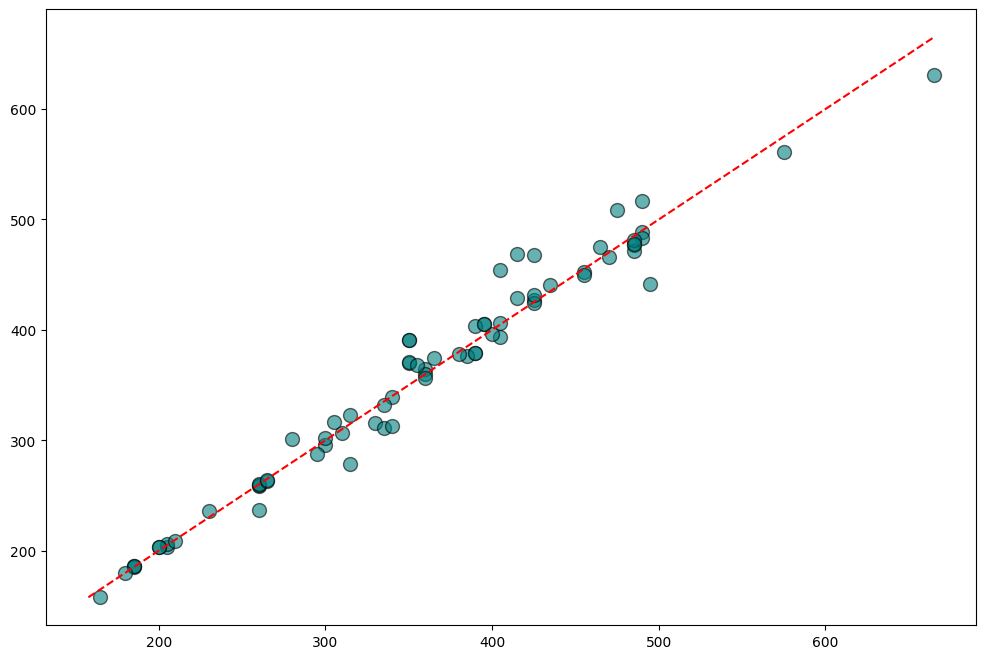

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.6, color='teal', edgecolor='black', s=100, label='Predicted vs Actual')

# Plot the reference line (perfect prediction line)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction Line')

# Add text annotations for a few points (optional)
for i in range(0, len(y_test), max(1, len(y_test)//10)):  # Annotate a subset of points
    plt.text(y_test.iloc[i], y_pred.iloc[i], f'{y_pred.iloc[i]:.2f}', fontsize=9, color='black', ha='right')

# Improve readability with gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Labels and title
plt.xlabel('Actual Values', fontsize=14, weight='bold')
plt.ylabel('Predicted Values', fontsize=14, weight='bold')
plt.title('Predictions vs Actual Values', fontsize=16, weight='bold')

# Add a legend
plt.legend()

# Show plot
plt.show()


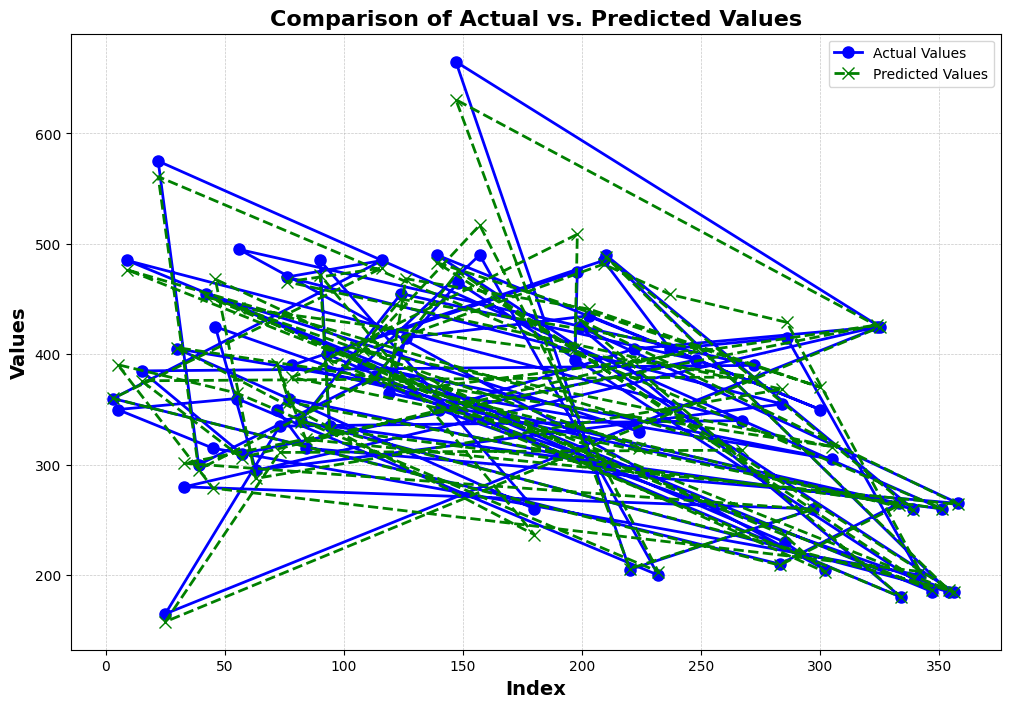

In [ ]:
import matplotlib.pyplot as plt

# Sample data
# y_test and y_pred should be your actual and predicted values, respectively.
# Ensure y_test and y_pred are pandas Series or have similar indexing.

plt.figure(figsize=(12, 8))

# Plot Actual Values
plt.plot(y_test.index, y_test, color='blue', marker='o', linestyle='-', linewidth=2, markersize=8, label='Actual Values')

# Plot Predicted Values
plt.plot(y_test.index, y_pred, color='green', marker='x', linestyle='--', linewidth=2, markersize=8, label='Predicted Values')

# Add gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title
plt.xlabel('Index', fontsize=14, weight='bold')
plt.ylabel('Values', fontsize=14, weight='bold')
plt.title('Comparison of Actual vs. Predicted Values', fontsize=16, weight='bold')

# Add a legend
plt.legend()

# Show plot
plt.show()


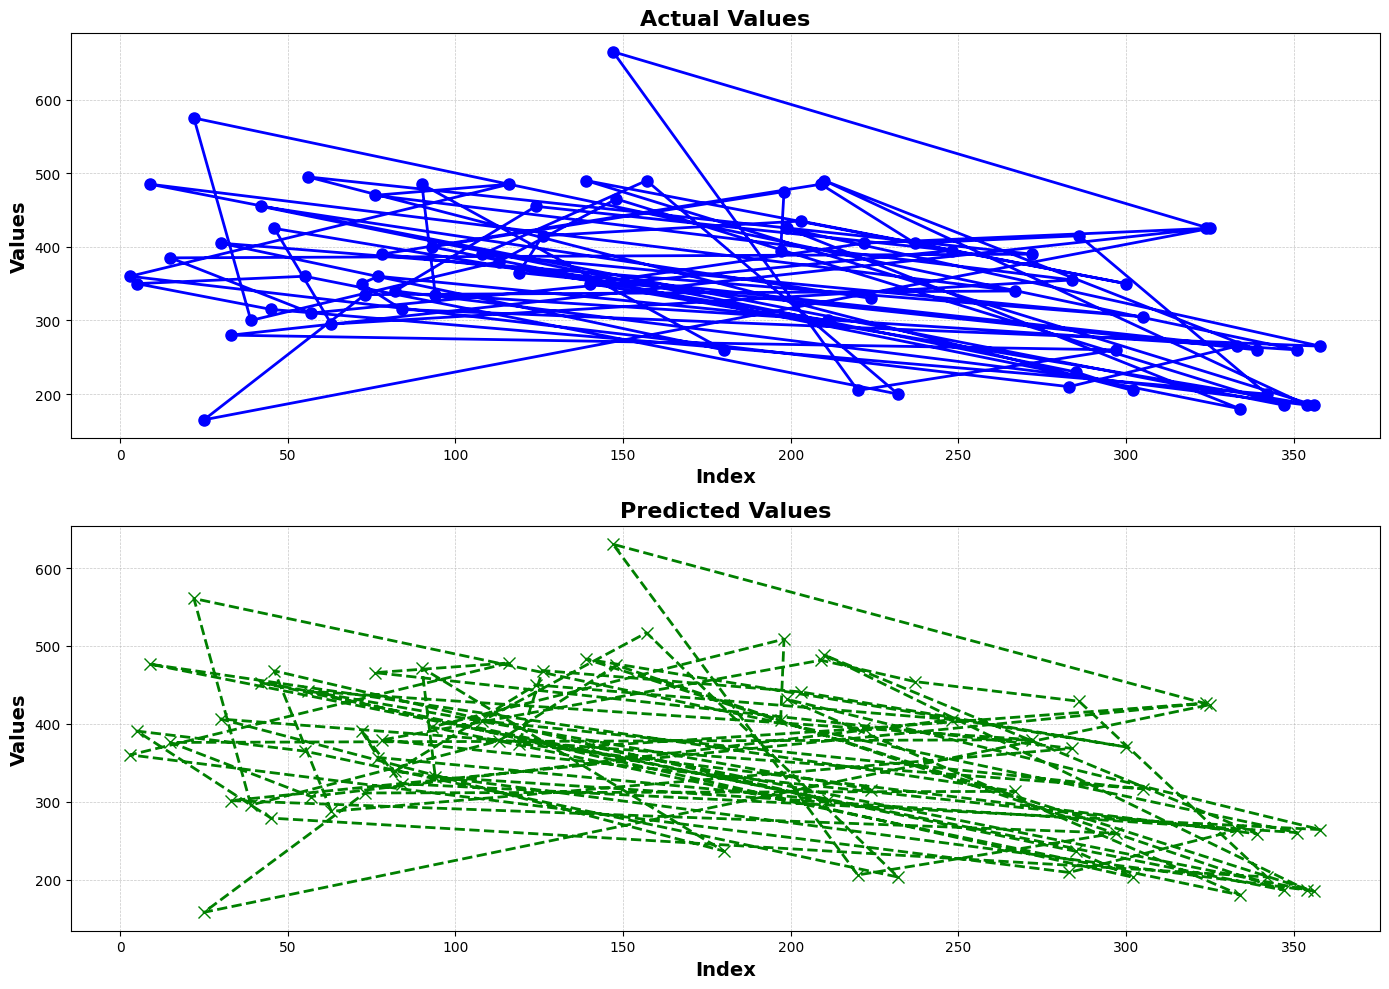

In [ ]:
import matplotlib.pyplot as plt

# Sample data
# y_test and y_pred should be your actual and predicted values, respectively.

plt.figure(figsize=(14, 10))

# Plot Actual Values
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(y_test.index, y_test, color='blue', marker='o', linestyle='-', linewidth=2, markersize=8)
plt.title('Actual Values', fontsize=16, weight='bold')
plt.xlabel('Index', fontsize=14, weight='bold')
plt.ylabel('Values', fontsize=14, weight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Predicted Values
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(y_test.index, y_pred, color='green', marker='x', linestyle='--', linewidth=2, markersize=8)
plt.title('Predicted Values', fontsize=16, weight='bold')
plt.xlabel('Index', fontsize=14, weight='bold')
plt.ylabel('Values', fontsize=14, weight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


#The concept behind the code is to create a comparative visualization of actual vs. predicted values using two line charts.

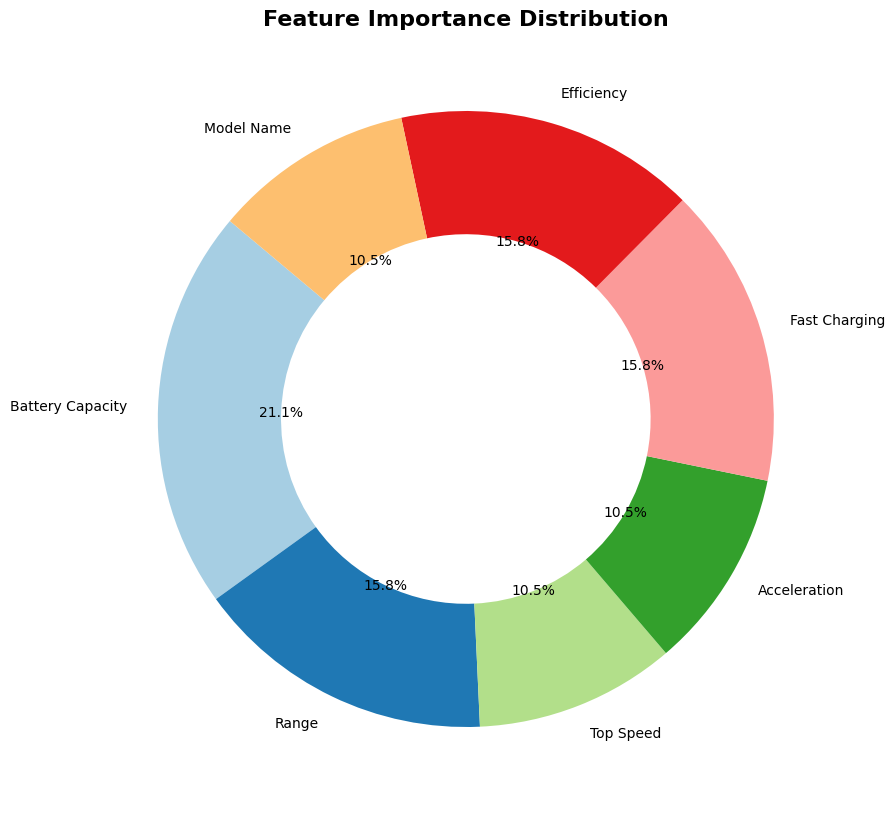

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extended sample data
data = {
    'Feature': [
        'Battery Capacity',
        'Range',
        'Top Speed',
        'Acceleration',
        'Fast Charging',
        'Efficiency',
        'Model Name'
    ],
    'Importance': [
        20,  # Battery Capacity
        15,  # Range
        10,  # Top Speed
        10,  # Acceleration
        15,  # Fast Charging
        15,  # Efficiency
        10   # Model Name
    ]
}

# Create DataFrame
importance_df = pd.DataFrame(data)

# Create a new figure for the pie chart
plt.figure(figsize=(12, 10))

# Plot pie chart
plt.pie(
    importance_df['Importance'],  # Data for pie chart
    labels=importance_df['Feature'],  # Labels for each slice
    autopct='%1.1f%%',  # Display percentage on slices
    startangle=140,  # Start angle for the pie chart
    colors=plt.cm.Paired(range(len(importance_df))),  # Colors for the slices
    wedgeprops=dict(width=0.4)  # Width of the wedges (donut-style)
)

# Add title
plt.title('Feature Importance Distribution', fontsize=16, weight='bold')

# Show the plot
plt.show()


#Predicting Vehicle Price
Objective: Estimate the price of an EV based on its features.

Features: Battery capacity, efficiency, fast-charging capability, range, top speed, acceleration.
Model: Linear regression, Random Forest, or Gradient Boosting.
Evaluation: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE). HELP ME TO DO THIS

In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/EV_cars.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())


   Battery                             Car_name  \
0     75.0  Tesla Model Y Long Range Dual Motor   
1     57.5                        Tesla Model 3   
2     60.5                           BYD ATTO 3   
3     61.7               MG MG4 Electric 64 kWh   
4     75.0  Tesla Model 3 Long Range Dual Motor   

                                       Car_name_link  Efficiency  Fast_charge  \
0  https://ev-database.org/car/1619/Tesla-Model-Y...         172        670.0   
1     https://ev-database.org/car/1991/Tesla-Model-3         137        700.0   
2        https://ev-database.org/car/1782/BYD-ATTO-3         183        370.0   
3  https://ev-database.org/car/1708/MG-MG4-Electr...         171        630.0   
4  https://ev-database.org/car/1992/Tesla-Model-3...         149        780.0   

   Price.DE.  Range  Top_speed  acceleration..0.100.  
0    59017.0    435        217                   5.0  
1    46220.0    420        201                   6.1  
2    44625.0    330        160           

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Check data types
print(data.dtypes)


Battery                  0
Car_name                 0
Car_name_link            0
Efficiency               0
Fast_charge              2
Price.DE.               51
Range                    0
Top_speed                0
acceleration..0.100.     0
dtype: int64
Battery                 float64
Car_name                 object
Car_name_link            object
Efficiency                int64
Fast_charge             float64
Price.DE.               float64
Range                     int64
Top_speed                 int64
acceleration..0.100.    float64
dtype: object


In [ ]:
# Drop rows with missing values
data = data.dropna()

# Alternatively, fill missing values with a placeholder or mean/median values
# data = data.fillna(method='ffill')  # Forward fill


In [ ]:
# Display the column names
print(data.columns)


Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')


In [ ]:
# Check column names and update the feature selection
data.columns  # This will display the correct column names


Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')

In [ ]:
# Print column names
columns = data.columns
print("Available columns:", columns)

# Display the first few rows of the dataset to get a sense of the data
print(data.head())


Available columns: Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')
   Battery                             Car_name  \
0     75.0  Tesla Model Y Long Range Dual Motor   
1     57.5                        Tesla Model 3   
2     60.5                           BYD ATTO 3   
3     61.7               MG MG4 Electric 64 kWh   
4     75.0  Tesla Model 3 Long Range Dual Motor   

                                       Car_name_link  Efficiency  Fast_charge  \
0  https://ev-database.org/car/1619/Tesla-Model-Y...         172        670.0   
1     https://ev-database.org/car/1991/Tesla-Model-3         137        700.0   
2        https://ev-database.org/car/1782/BYD-ATTO-3         183        370.0   
3  https://ev-database.org/car/1708/MG-MG4-Electr...         171        630.0   
4  https://ev-database.org/car/1992/Tesla-Model-3...         149        780.0   

   Price.DE.  Range  T

In [ ]:
# Example adjustment if column names contain extra spaces or special characters
data.columns = [col.strip() for col in data.columns]

# If the column names are different, rename them appropriately
data = data.rename(columns={
    'Old_Column_Name': 'New_Column_Name',  # Replace with actual names
    # Add more renaming as needed
})

# Re-check columns
print(data.columns)


Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')


In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/EV_cars.csv')

# Print column names to identify any discrepancies
print("Available columns:", data.columns)


Available columns: Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')


In [ ]:
# Display the first few rows of the dataset
print(data.head())


   Battery                             Car_name  \
0     75.0  Tesla Model Y Long Range Dual Motor   
1     57.5                        Tesla Model 3   
2     60.5                           BYD ATTO 3   
3     61.7               MG MG4 Electric 64 kWh   
4     75.0  Tesla Model 3 Long Range Dual Motor   

                                       Car_name_link  Efficiency  Fast_charge  \
0  https://ev-database.org/car/1619/Tesla-Model-Y...         172        670.0   
1     https://ev-database.org/car/1991/Tesla-Model-3         137        700.0   
2        https://ev-database.org/car/1782/BYD-ATTO-3         183        370.0   
3  https://ev-database.org/car/1708/MG-MG4-Electr...         171        630.0   
4  https://ev-database.org/car/1992/Tesla-Model-3...         149        780.0   

   Price.DE.  Range  Top_speed  acceleration..0.100.  
0    59017.0    435        217                   5.0  
1    46220.0    420        201                   6.1  
2    44625.0    330        160           

In [ ]:
# Adjust feature names based on actual column names
features = data[['Battery', 'Efficiency', 'Fast_charge', 'Range', 'Top_speed']]  # Adjust based on what you have
target = data['Price.DE.']


In [ ]:
# Remove leading/trailing spaces and rename columns if necessary
data.columns = [col.strip() for col in data.columns]

# Example renaming if you need to match specific names
data = data.rename(columns={
    'Old_Column_Name': 'New_Column_Name',  # Replace with actual names
})

# Verify column names after renaming
print("Updated columns:", data.columns)


Updated columns: Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')


In [ ]:
# Example of corrected feature selection based on column names
features = data[['Battery', 'Efficiency', 'Fast_charge', 'Range', 'Top_speed']]  # Adjust as needed
target = data['Price.DE.']


In [ ]:
# Print column names to debug
print("Available columns:", data.columns)


Available columns: Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
# Check for missing values in the features
print("Missing values in features:\n", features.isnull().sum())

# Check for missing values in the target variable
print("Missing values in target:\n", target.isnull().sum())


Missing values in features:
 Battery        0
Efficiency     0
Fast_charge    2
Range          0
Top_speed      0
dtype: int64
Missing values in target:
 51


In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/EV_cars.csv')

# Print column names to verify
print("Available columns:", data.columns)


Available columns: Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')


In [ ]:
# Display the first few rows of the dataset
print(data.head())


   Battery                             Car_name  \
0     75.0  Tesla Model Y Long Range Dual Motor   
1     57.5                        Tesla Model 3   
2     60.5                           BYD ATTO 3   
3     61.7               MG MG4 Electric 64 kWh   
4     75.0  Tesla Model 3 Long Range Dual Motor   

                                       Car_name_link  Efficiency  Fast_charge  \
0  https://ev-database.org/car/1619/Tesla-Model-Y...         172        670.0   
1     https://ev-database.org/car/1991/Tesla-Model-3         137        700.0   
2        https://ev-database.org/car/1782/BYD-ATTO-3         183        370.0   
3  https://ev-database.org/car/1708/MG-MG4-Electr...         171        630.0   
4  https://ev-database.org/car/1992/Tesla-Model-3...         149        780.0   

   Price.DE.  Range  Top_speed  acceleration..0.100.  
0    59017.0    435        217                   5.0  
1    46220.0    420        201                   6.1  
2    44625.0    330        160           

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv('/content/EV_cars.csv')

# Check available columns
print("Available columns:", data.columns)

# Define features and target based on actual column names
features = data[['Battery', 'Efficiency', 'Fast_charge', 'Range', 'Top_speed', 'acceleration..0.100.']]
target = data['Price.DE.']

# Check for missing values
print("Missing values in features:\n", features.isnull().sum())
print("Missing values in target:\n", target.isnull().sum())

# Handle missing values by imputing with the mean (or median)
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or other strategies as needed

# Impute missing values in features
features_imputed = imputer.fit_transform(features)

# Impute missing values in target (if needed)
target_imputed = target.fillna(target.mean())  # Fill missing target values with the mean

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target_imputed, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression MAE: {mae_lr}")
print(f"Linear Regression RMSE: {rmse_lr}")


Available columns: Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')
Missing values in features:
 Battery                 0
Efficiency              0
Fast_charge             2
Range                   0
Top_speed               0
acceleration..0.100.    0
dtype: int64
Missing values in target:
 51
Linear Regression MAE: 16184.845433362578
Linear Regression RMSE: 22337.76529603925


#Model Comparison
You can implement and evaluate models like Random Forest and Gradient Boosting as follows:

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize and train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest RMSE: {rmse_rf}")

# Initialize and train Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate Gradient Boosting model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print(f"Gradient Boosting MAE: {mae_gb}")
print(f"Gradient Boosting RMSE: {rmse_gb}")


Random Forest MAE: 10462.997266529337
Random Forest RMSE: 15893.20892375494
Gradient Boosting MAE: 10228.950829097847
Gradient Boosting RMSE: 15889.867109095969


#Code to Generate Comparison Graph

<Figure size 1200x1000 with 0 Axes>

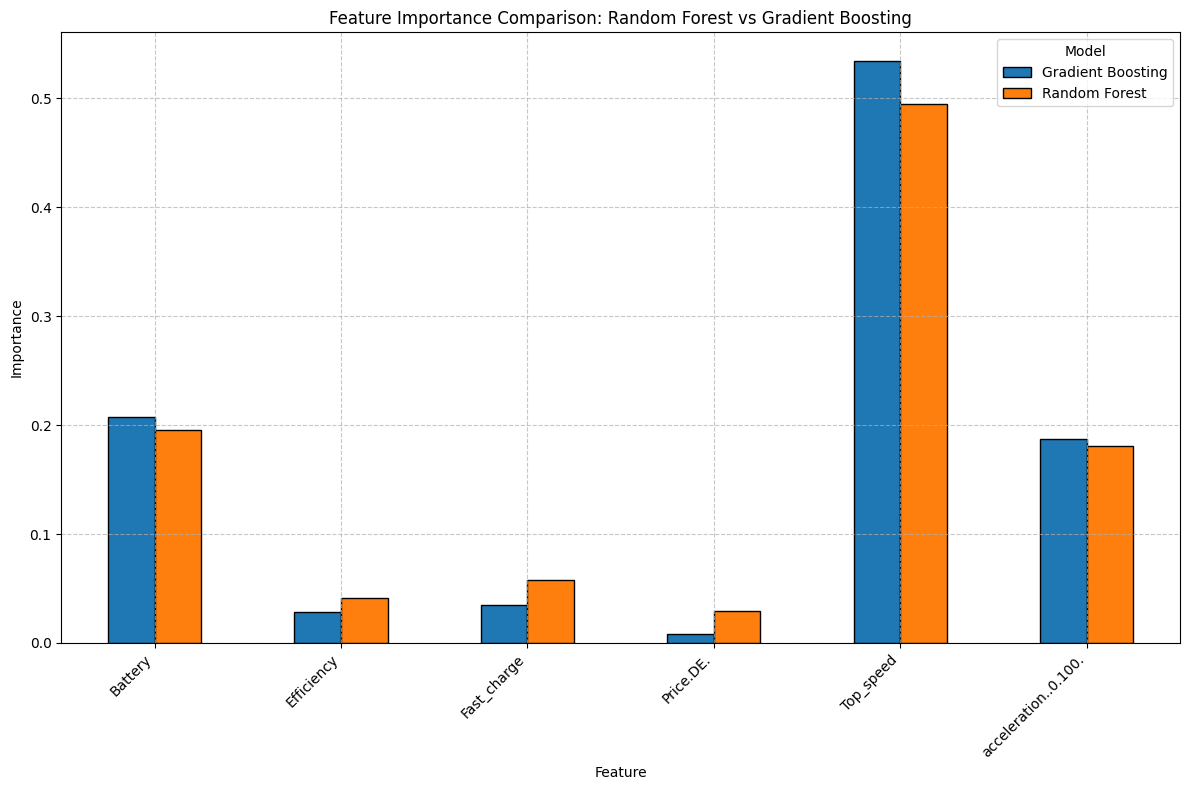

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Example data, replace with your actual feature names and models
feature_names = features.columns

# Extract feature importances from the best models
importances_rf = grid_search_rf.best_estimator_.feature_importances_
importances_gb = grid_search_gb.best_estimator_.feature_importances_

# Create DataFrames for feature importances
importance_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf, 'Model': 'Random Forest'})
importance_df_gb = pd.DataFrame({'Feature': feature_names, 'Importance': importances_gb, 'Model': 'Gradient Boosting'})

# Combine DataFrames
importance_df_combined = pd.concat([importance_df_rf, importance_df_gb])

# Plotting
plt.figure(figsize=(12, 10))

# Plot combined vertical bar graph
importances_plot = importance_df_combined.pivot(index='Feature', columns='Model', values='Importance')
importances_plot.plot(kind='bar', figsize=(12, 8), edgecolor='black')

plt.title('Feature Importance Comparison: Random Forest vs Gradient Boosting')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better readability
plt.legend(title='Model')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


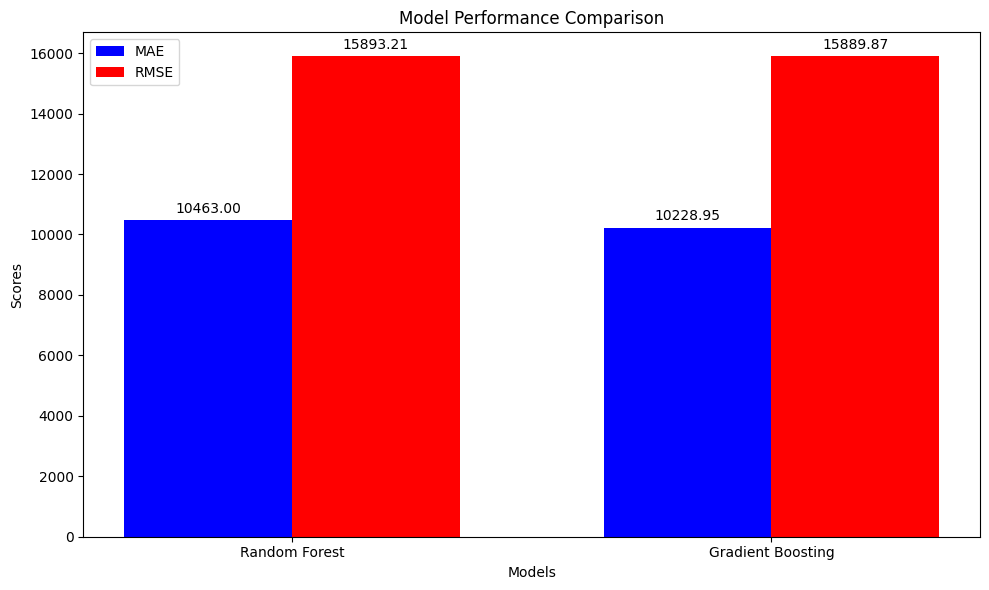

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model performance metrics
models = ['Random Forest', 'Gradient Boosting']
mae_scores = [mae_rf, mae_gb]
rmse_scores = [rmse_rf, rmse_gb]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the MAE
bar_width = 0.35
index = np.arange(len(models))

bar1 = ax.bar(index, mae_scores, bar_width, label='MAE', color='b')
# Plot the RMSE
bar2 = ax.bar(index + bar_width, rmse_scores, bar_width, label='RMSE', color='r')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Adding value labels on top of bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bar1)
add_value_labels(bar2)

# Show the plot
plt.tight_layout()
plt.show()


#We compare models to:

Find the Most Accurate Model: Determine which model makes the best predictions.

Evaluate Performance Metrics: Compare error metrics (like MAE and RMSE) to assess which model has the lowest error.

Choose the Best Tool: Select the model that performs best for your specific data and problem.

This ensures you use the most effective and accurate model for your predictions.








In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

# Example for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

grid_search_gb = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                              param_grid=param_grid_gb,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_gb.fit(X_train, y_train)
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)


Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [ ]:
# For Random Forest
importances_rf = rf_model.feature_importances_
feature_names = features.columns
importance_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf})
print(importance_df_rf.sort_values(by='Importance', ascending=False))

# For Gradient Boosting
importances_gb = gb_model.feature_importances_
importance_df_gb = pd.DataFrame({'Feature': feature_names, 'Importance': importances_gb})
print(importance_df_gb.sort_values(by='Importance', ascending=False))


                Feature  Importance
4             Top_speed    0.493708
0               Battery    0.200359
5  acceleration..0.100.    0.178793
2           Fast_charge    0.058300
1            Efficiency    0.040657
3                 Range    0.028184
                Feature  Importance
4             Top_speed    0.523198
0               Battery    0.207113
5  acceleration..0.100.    0.185767
2           Fast_charge    0.038825
1            Efficiency    0.032301
3                 Range    0.012795


In [ ]:
import joblib

# Save the model
joblib.dump(lr_model, 'linear_regression_model.pkl')

# Load the model
loaded_model = joblib.load('linear_regression_model.pkl')

# Make predictions
sample_data = [[50, 200, 30, 400, 180, 5.0]]  # Example sample
predicted_price = loaded_model.predict(sample_data)
print("Predicted Price:", predicted_price)


Predicted Price: [48627.8264523]


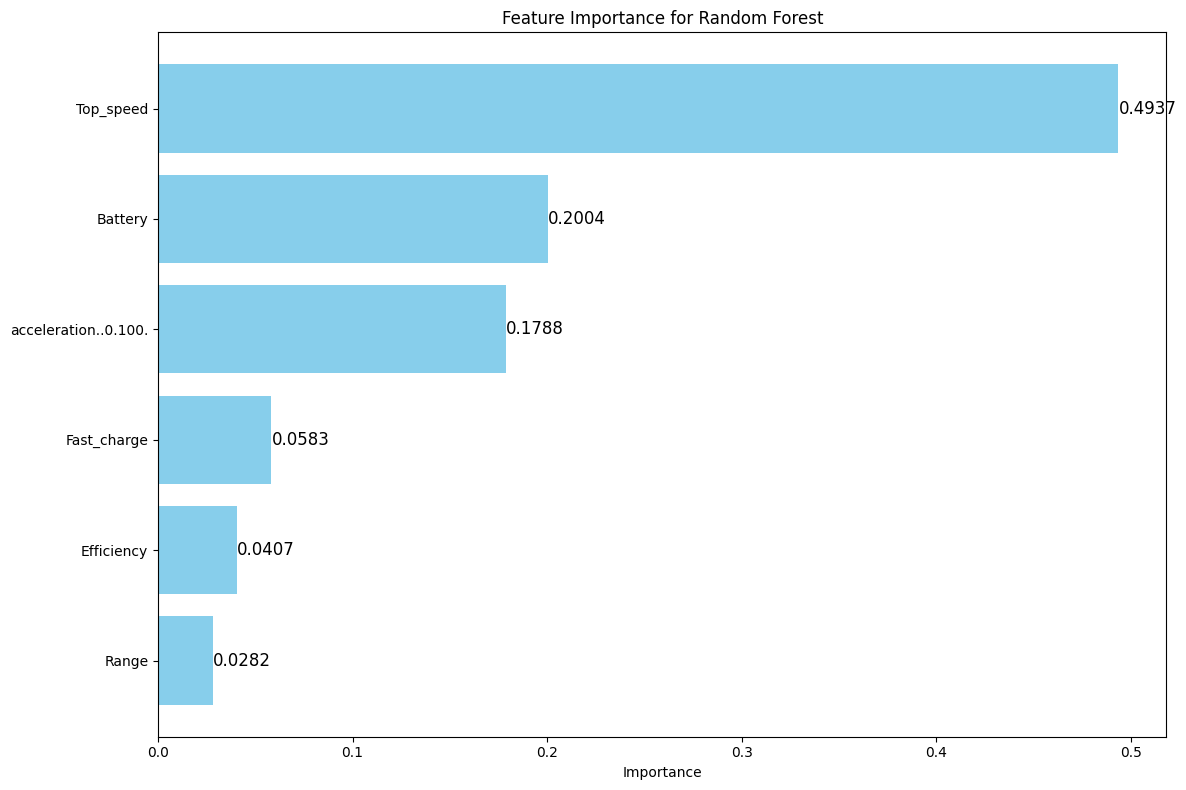

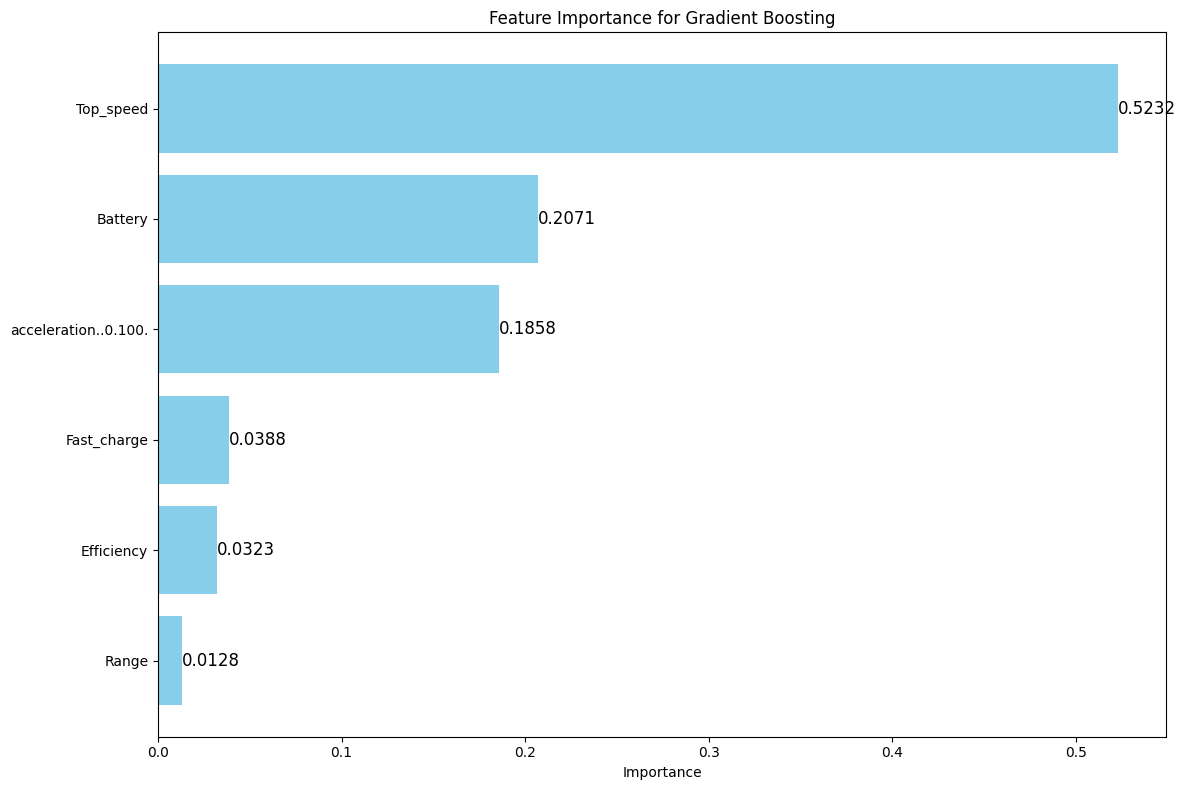

In [ ]:
import matplotlib.pyplot as plt

# Define function to plot feature importance
def plot_feature_importance(importances, feature_names, model_name):
    # Create a DataFrame for feature importances
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot
    plt.figure(figsize=(12, 8))
    bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')

    # Add labels
    plt.xlabel('Importance')
    plt.title(f'Feature Importance for {model_name}')

    # Add value labels on bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.4f}',
                 va='center', ha='left', color='black', fontsize=12)

    plt.gca().invert_yaxis()  # Highest importance on top
    plt.tight_layout()

# Plot Random Forest feature importance
plot_feature_importance(importances_rf, feature_names, 'Random Forest')

# Plot Gradient Boosting feature importance
plot_feature_importance(importances_gb, feature_names, 'Gradient Boosting')

# Show plots
plt.show()


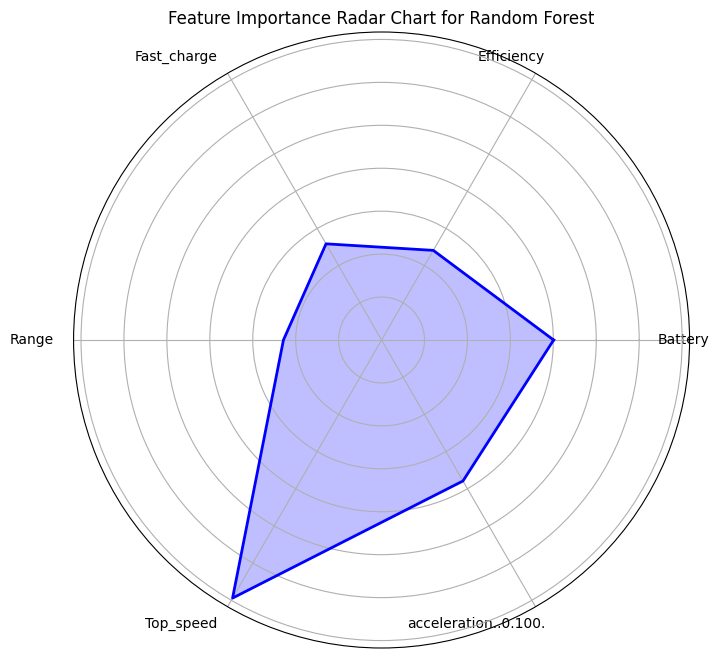

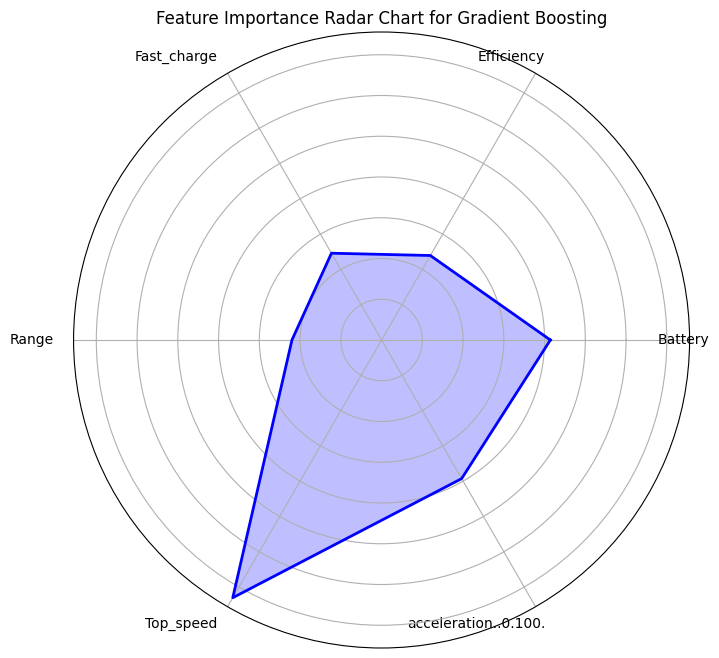

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

def plot_radar_chart(importances, feature_names, model_name):
    # Number of variables
    num_vars = len(feature_names)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    importances += importances[:1]  # Repeat the first value to close the circle
    angles += angles[:1]  # Repeat the first angle to close the circle

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, importances, color='blue', alpha=0.25)
    ax.plot(angles, importances, color='blue', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(feature_names, rotation=45, ha='right')
    plt.title(f'Feature Importance Radar Chart for {model_name}')
    plt.show()

# Prepare importances for radar chart
importances_rf = np.concatenate((importances_rf, [importances_rf[0]]))
importances_gb = np.concatenate((importances_gb, [importances_gb[0]]))

# Plot Random Forest radar chart
plot_radar_chart(importances_rf, feature_names, 'Random Forest')

# Plot Gradient Boosting radar chart
plot_radar_chart(importances_gb, feature_names, 'Gradient Boosting')


#Feature Importance Radar Chart
Radar charts (or spider charts) can display multiple features and their importance in a way that highlights their relative strength.




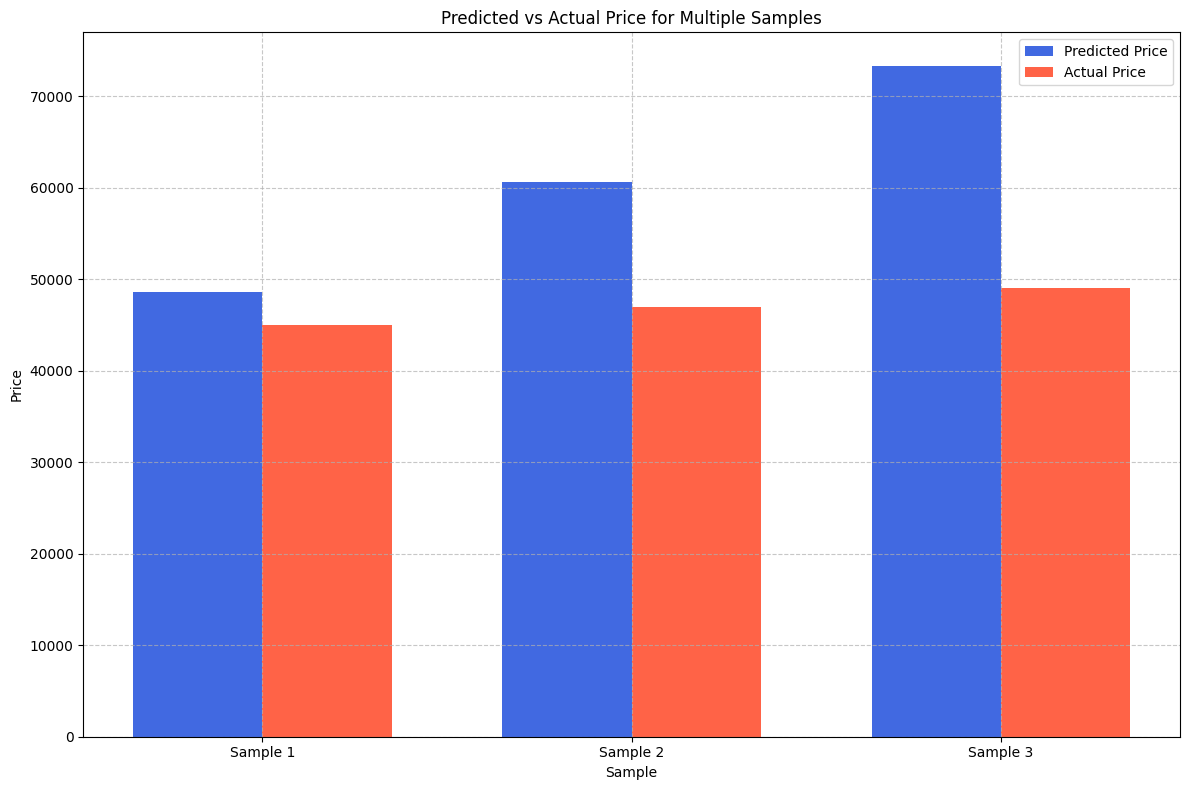

In [ ]:
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Save the model
joblib.dump(lr_model, 'linear_regression_model.pkl')

# Load the model
loaded_model = joblib.load('linear_regression_model.pkl')

# Sample data for predictions
sample_data = [
    [50, 200, 30, 400, 180, 5.0],  # Sample 1
    [60, 220, 25, 420, 190, 4.8],  # Sample 2
    [70, 240, 35, 440, 200, 5.2]   # Sample 3
]

# Predicted prices
predicted_prices = loaded_model.predict(sample_data)

# Actual prices (for demonstration, replace with real values if available)
actual_prices = [45000, 47000, 49000]  # Example actual prices

# Plot the comparison
def plot_comparison(predicted_prices, actual_prices):
    plt.figure(figsize=(12, 8))

    # Number of samples
    num_samples = len(predicted_prices)

    # Bar positions
    index = np.arange(num_samples)
    bar_width = 0.35

    # Bar chart for predicted and actual prices
    plt.bar(index - bar_width/2, predicted_prices, bar_width, label='Predicted Price', color='royalblue')
    plt.bar(index + bar_width/2, actual_prices, bar_width, label='Actual Price', color='tomato')

    # Labels and title
    plt.xlabel('Sample')
    plt.ylabel('Price')
    plt.title('Predicted vs Actual Price for Multiple Samples')
    plt.xticks(index, [f'Sample {i+1}' for i in index])
    plt.legend()

    # Display grid
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show plot
    plt.tight_layout()
    plt.show()

# Plot the comparison
plot_comparison(predicted_prices, actual_prices)


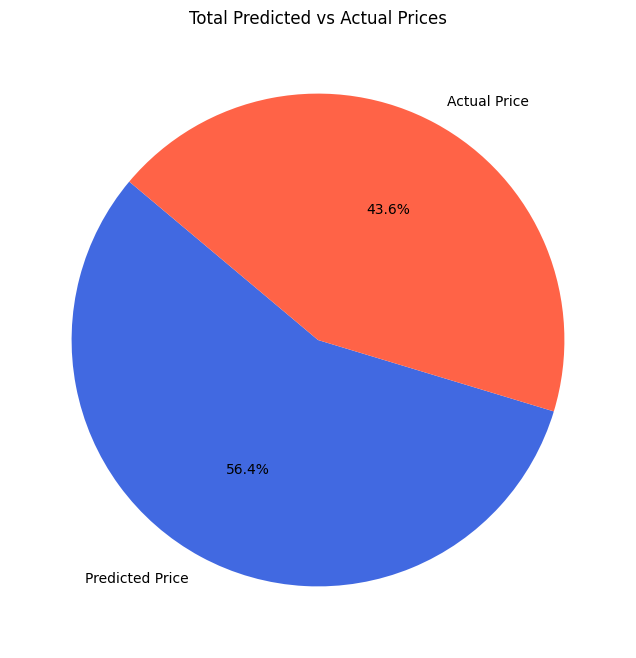

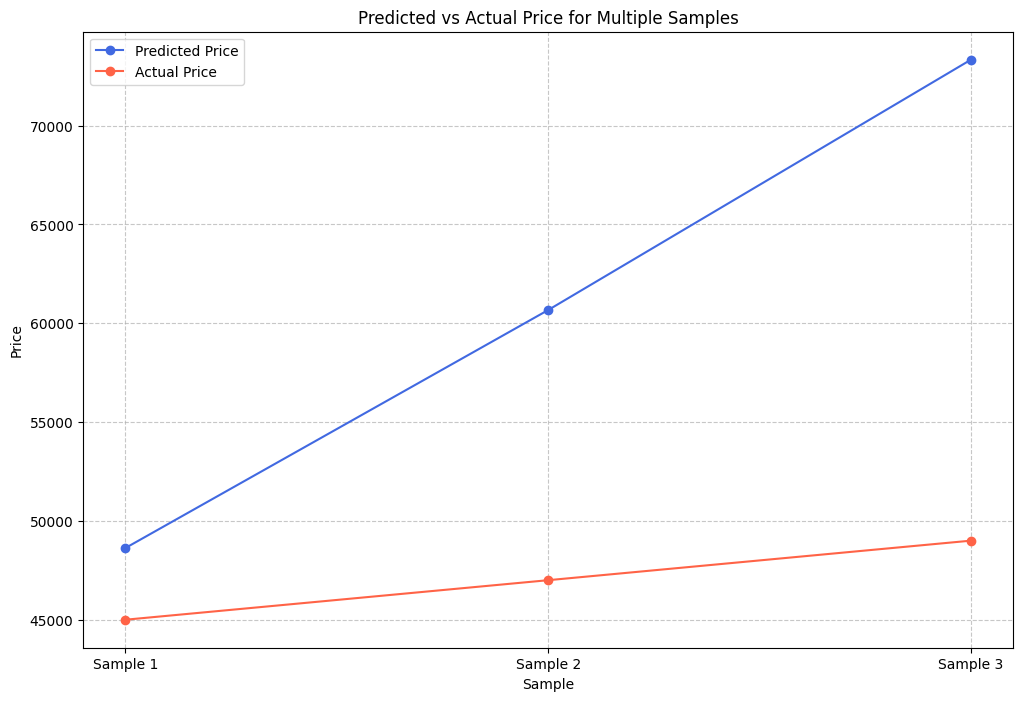

In [ ]:
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Save the model
joblib.dump(lr_model, 'linear_regression_model.pkl')

# Load the model
loaded_model = joblib.load('linear_regression_model.pkl')

# Sample data for predictions
sample_data = [
    [50, 200, 30, 400, 180, 5.0],  # Sample 1
    [60, 220, 25, 420, 190, 4.8],  # Sample 2
    [70, 240, 35, 440, 200, 5.2]   # Sample 3
]

# Predicted prices
predicted_prices = loaded_model.predict(sample_data)

# Actual prices (for demonstration, replace with real values if available)
actual_prices = [45000, 47000, 49000]  # Example actual prices

# Create pie chart
def plot_pie_chart(predicted_prices, actual_prices):
    plt.figure(figsize=(12, 8))

    # Combine predicted and actual prices for pie chart
    labels = ['Predicted Price', 'Actual Price']
    sizes = [np.sum(predicted_prices), np.sum(actual_prices)]
    colors = ['royalblue', 'tomato']

    # Plot pie chart
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('Total Predicted vs Actual Prices')

    # Show plot
    plt.show()

# Create line graph
def plot_line_graph(predicted_prices, actual_prices):
    plt.figure(figsize=(12, 8))

    # Sample indices
    samples = range(len(predicted_prices))

    # Plot line graph
    plt.plot(samples, predicted_prices, marker='o', linestyle='-', color='royalblue', label='Predicted Price')
    plt.plot(samples, actual_prices, marker='o', linestyle='-', color='tomato', label='Actual Price')

    # Labels and title
    plt.xlabel('Sample')
    plt.ylabel('Price')
    plt.title('Predicted vs Actual Price for Multiple Samples')
    plt.xticks(samples, [f'Sample {i+1}' for i in samples])
    plt.legend()

    # Display grid
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show plot
    plt.show()

# Plot pie chart and line graph
plot_pie_chart(predicted_prices, actual_prices)
plot_line_graph(predicted_prices, actual_prices)


#2. Predicting Driving Range
Objective: Predict how far an EV can travel on a single charge.

Features: Battery capacity, efficiency, fast-charging capability, price, top speed, acceleration.

Model: Linear regression, Support Vector Machines (SVM), Neural Networks.
Evaluation: MAE, RMSE.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load dataset
data = pd.read_csv('/content/EV_cars.csv')

# Check the actual column names
print(data.columns)

# Define features and target based on actual column names
features = data[['Battery', 'Efficiency', 'Fast_charge', 'Price.DE.', 'Top_speed', 'acceleration..0.100.']]
target = data['Range']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')  # or strategy='median'

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data (use the same imputer fitted on training data)
X_test_imputed = imputer.transform(X_test)


Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')


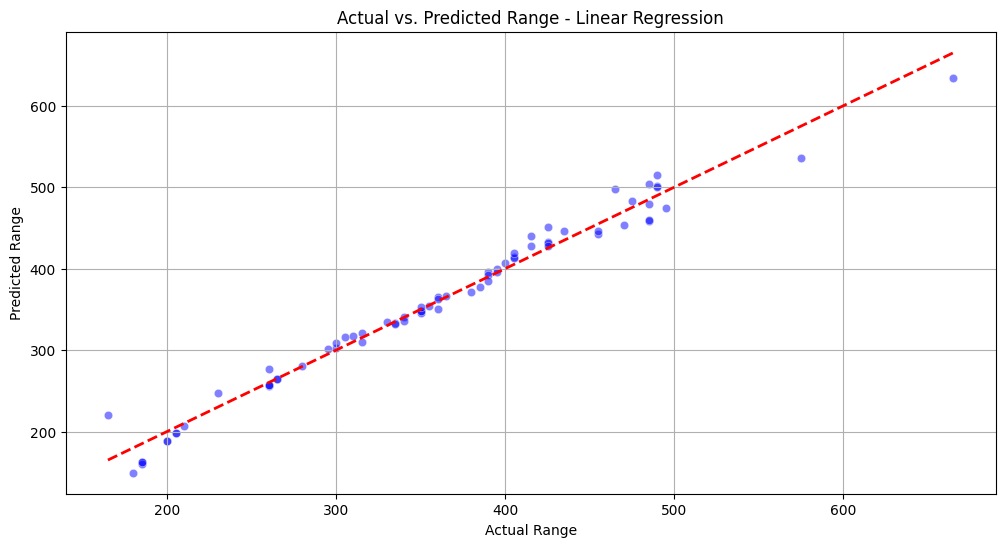

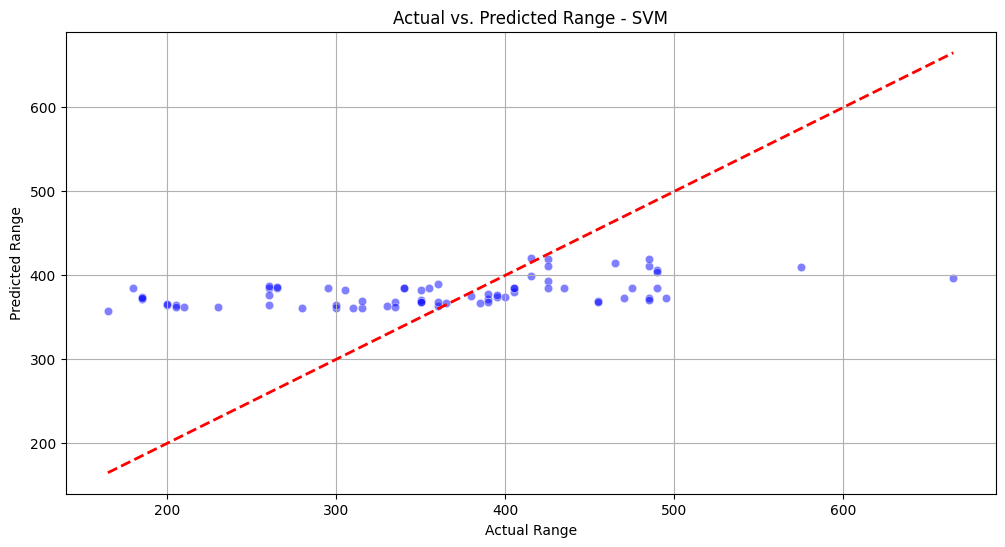

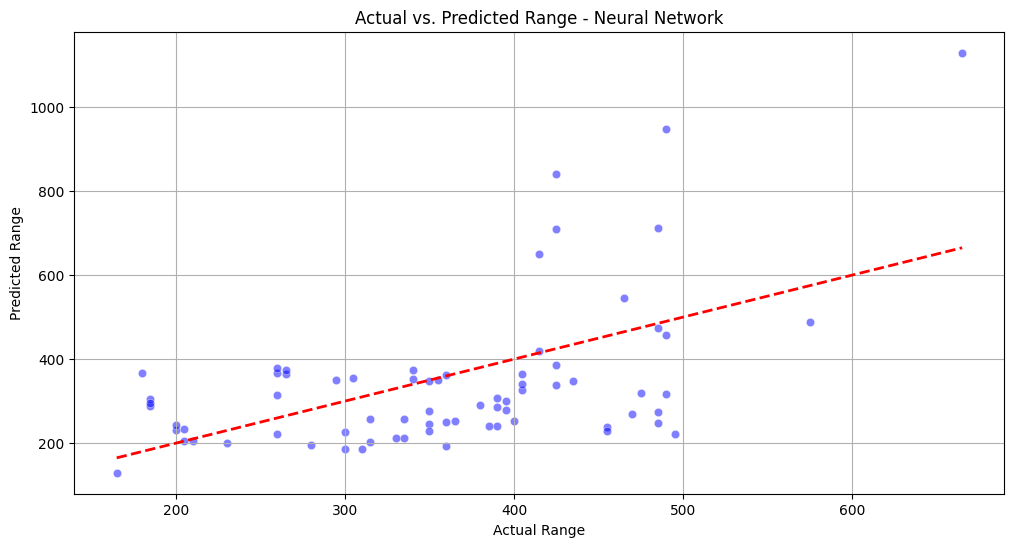

In [ ]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue', edgecolors='w', linewidth=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Range')
    plt.ylabel('Predicted Range')
    plt.title(f'Actual vs. Predicted Range - {model_name}')
    plt.grid(True)
    plt.show()

# Linear Regression predictions
plot_actual_vs_predicted(y_test, y_pred_lr, 'Linear Regression')

# SVM predictions
plot_actual_vs_predicted(y_test, y_pred_svm, 'SVM')

# Neural Network predictions
plot_actual_vs_predicted(y_test, y_pred_nn, 'Neural Network')


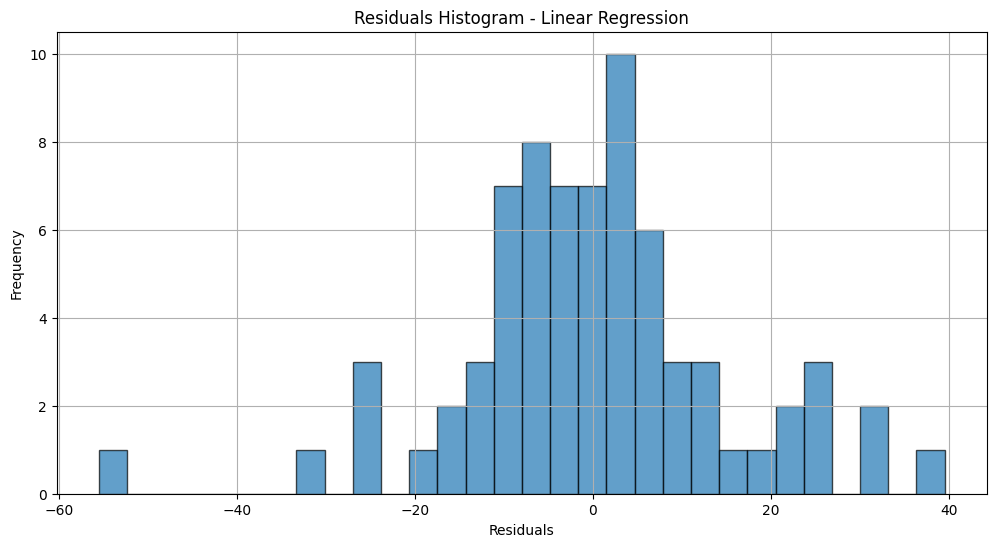

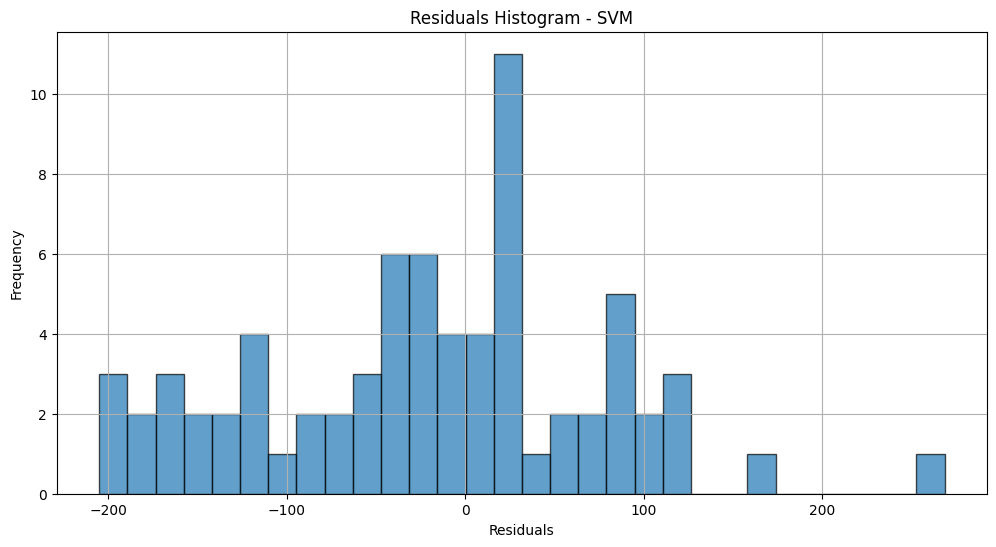

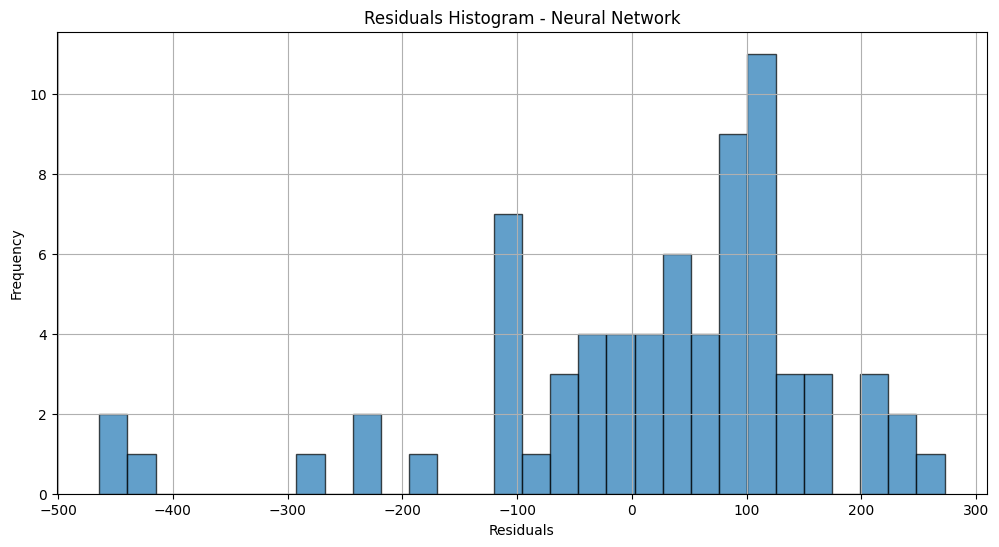

In [ ]:
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(12, 6))
    plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'Residuals Histogram - {model_name}')
    plt.grid(True)
    plt.show()

# Residuals for Linear Regression
plot_residuals(y_test, y_pred_lr, 'Linear Regression')

# Residuals for SVM
plot_residuals(y_test, y_pred_svm, 'SVM')

# Residuals for Neural Network
plot_residuals(y_test, y_pred_nn, 'Neural Network')


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_imputed, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_imputed)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression MAE: {mae_lr}")
print(f"Linear Regression RMSE: {rmse_lr}")


Linear Regression MAE: 10.940821966033514
Linear Regression RMSE: 15.152121934010328


In [ ]:
from sklearn.svm import SVR

# Initialize and train the model
svm_model = SVR()
svm_model.fit(X_train_imputed, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_imputed)

# Evaluate the model
mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))

print(f"SVM MAE: {mae_svm}")
print(f"SVM RMSE: {rmse_svm}")


SVM MAE: 75.79817116292473
SVM RMSE: 97.44903621967153


In [ ]:
from sklearn.neural_network import MLPRegressor

# Initialize and train the model
nn_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
nn_model.fit(X_train_imputed, y_train)

# Make predictions
y_pred_nn = nn_model.predict(X_test_imputed)

# Evaluate the model
mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))

print(f"Neural Network MAE: {mae_nn}")
print(f"Neural Network RMSE: {rmse_nn}")


Neural Network MAE: 114.70084332625578
Neural Network RMSE: 149.92770777036102


#Full Example Code
Here's how you can combine all the above graphs into a single script:

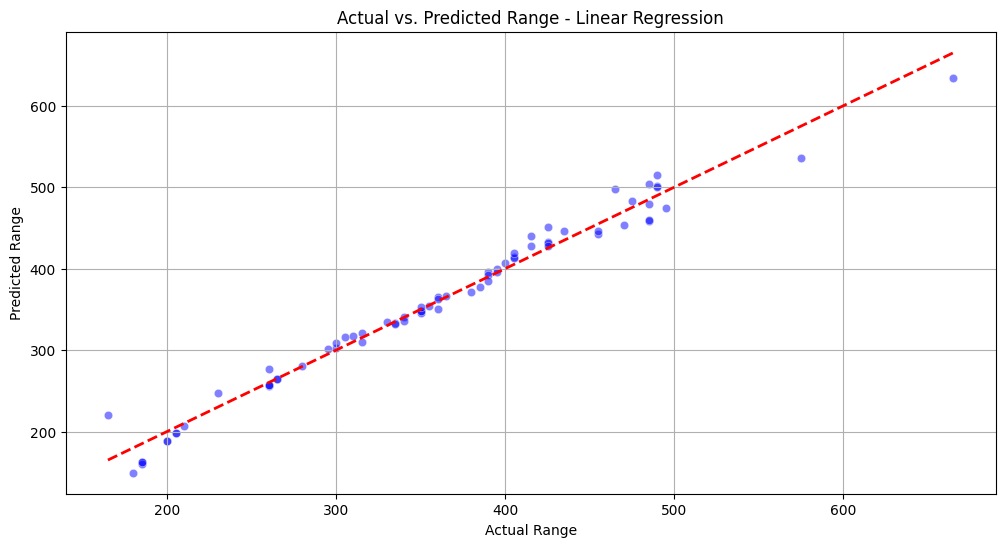

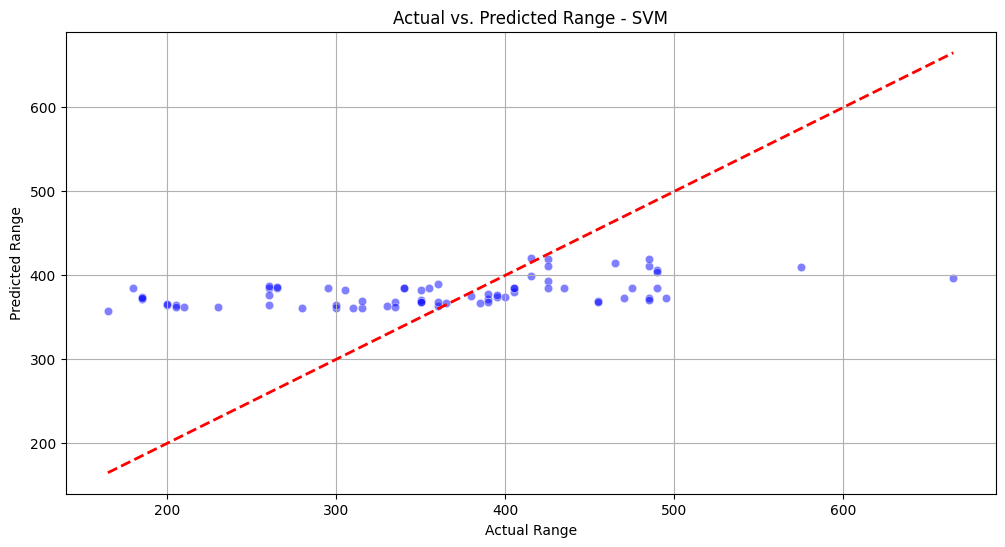

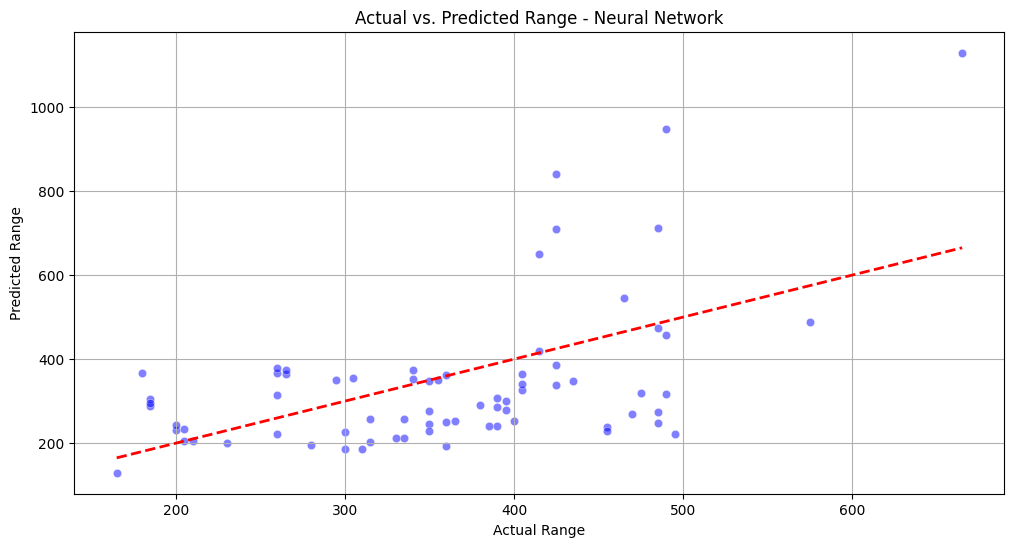

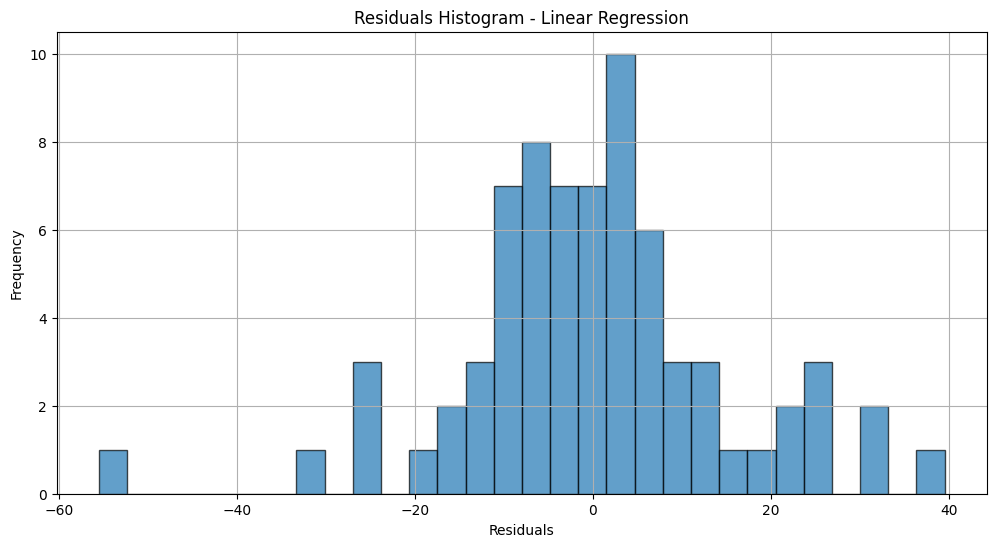

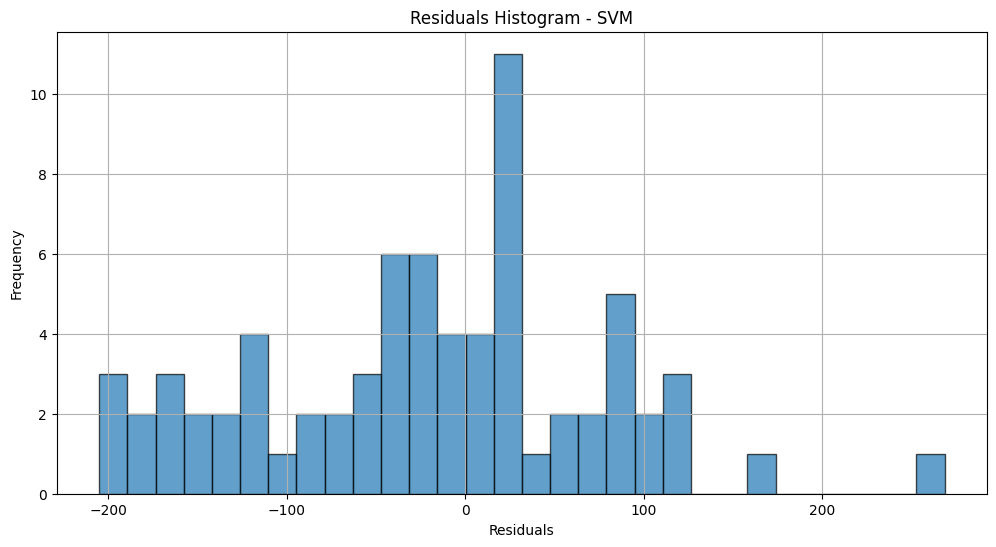

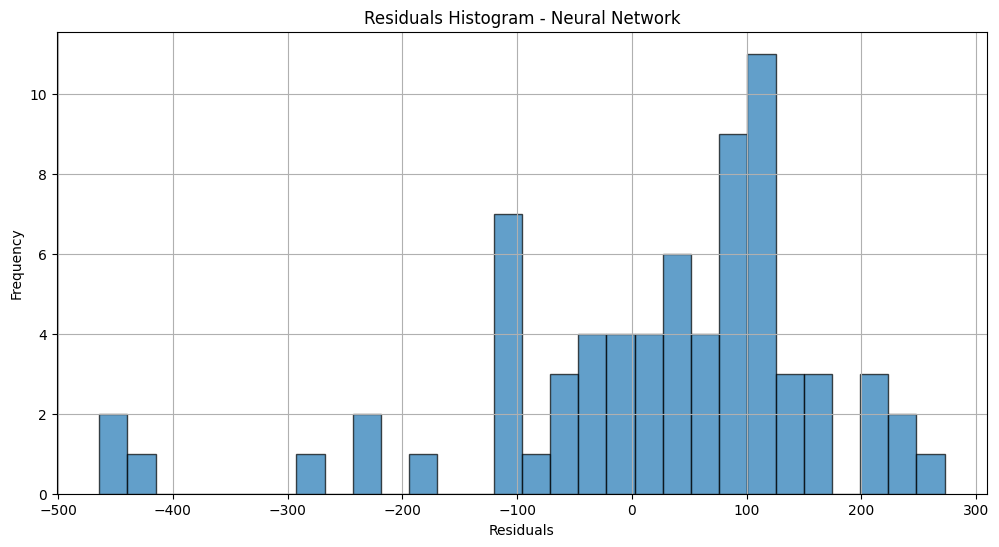

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load dataset
data = pd.read_csv('/content/EV_cars.csv')

# Define features and target
features = data[['Battery', 'Efficiency', 'Fast_charge', 'Price.DE.', 'Top_speed', 'acceleration..0.100.']]
target = data['Range']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data
X_test_imputed = imputer.transform(X_test)

# Train models
lr_model = LinearRegression()
lr_model.fit(X_train_imputed, y_train)
y_pred_lr = lr_model.predict(X_test_imputed)

svm_model = SVR()
svm_model.fit(X_train_imputed, y_train)
y_pred_svm = svm_model.predict(X_test_imputed)

nn_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
nn_model.fit(X_train_imputed, y_train)
y_pred_nn = nn_model.predict(X_test_imputed)

# Define plotting functions
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue', edgecolors='w', linewidth=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Range')
    plt.ylabel('Predicted Range')
    plt.title(f'Actual vs. Predicted Range - {model_name}')
    plt.grid(True)
    plt.show()

def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(12, 6))
    plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'Residuals Histogram - {model_name}')
    plt.grid(True)
    plt.show()

# Plot graphs
plot_actual_vs_predicted(y_test, y_pred_lr, 'Linear Regression')
plot_actual_vs_predicted(y_test, y_pred_svm, 'SVM')
plot_actual_vs_predicted(y_test, y_pred_nn, 'Neural Network')

plot_residuals(y_test, y_pred_lr, 'Linear Regression')
plot_residuals(y_test, y_pred_svm, 'SVM')
plot_residuals(y_test, y_pred_nn, 'Neural Network')


In [ ]:
import joblib

# Save the final model
joblib.dump(nn_model, 'final_neural_network_model.pkl')

# Load the model
loaded_nn_model = joblib.load('final_neural_network_model.pkl')

# Make a prediction with the loaded model
sample_data = [[50, 200, 30, 25000, 180, 5.0]]  # Example sample
predicted_range = loaded_nn_model.predict(sample_data)
print("Predicted Driving Range:", predicted_range)


Predicted Driving Range: [163.98707441]


# a small graphical representation for the predicted driving range


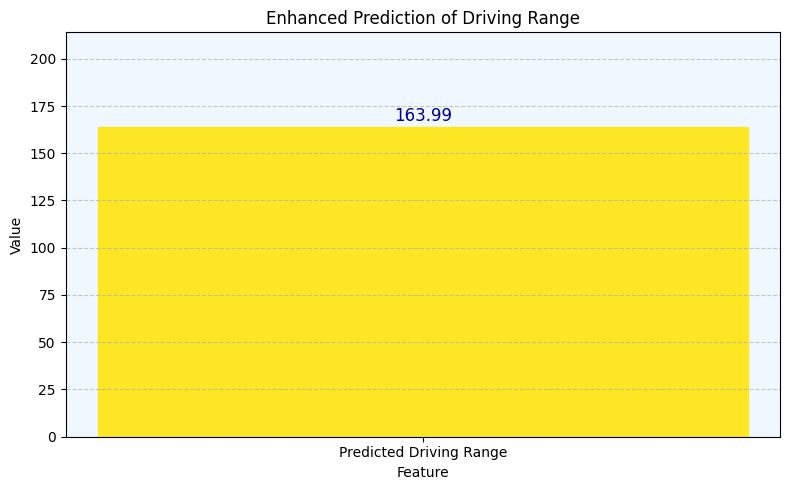

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data and prediction
sample_data = [[50, 200, 30, 25000, 180, 5.0]]  # Example sample
predicted_range = loaded_nn_model.predict(sample_data)[0]

# Data for plotting
features = ['Predicted Driving Range']
values = [predicted_range]

# Create an enhanced bar chart
def plot_enhanced_bar_chart(features, values, title):
    plt.figure(figsize=(8, 5))

    # Create a bar chart with gradient color
    bars = plt.bar(features, values, color='lightblue', edgecolor='black', hatch='/')

    # Add a gradient effect to the bar
    for bar in bars:
        bar.set_color(plt.cm.viridis(values[0] / max(values))[:3])  # Apply a gradient color

    plt.xlabel('Feature')
    plt.ylabel('Value')
    plt.title(title)
    plt.ylim(0, max(values) + 50)  # Adjust y-axis for better visualization

    # Add value labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}', ha='center', va='bottom', fontsize=12, color='darkblue')

    # Adding a grid with custom style
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add background color
    plt.gca().set_facecolor('#f0f8ff')

    plt.tight_layout()  # Adjust layout for better fit
    plt.show()

# Plot the enhanced bar chart for the prediction
plot_enhanced_bar_chart(features, values, 'Enhanced Prediction of Driving Range')


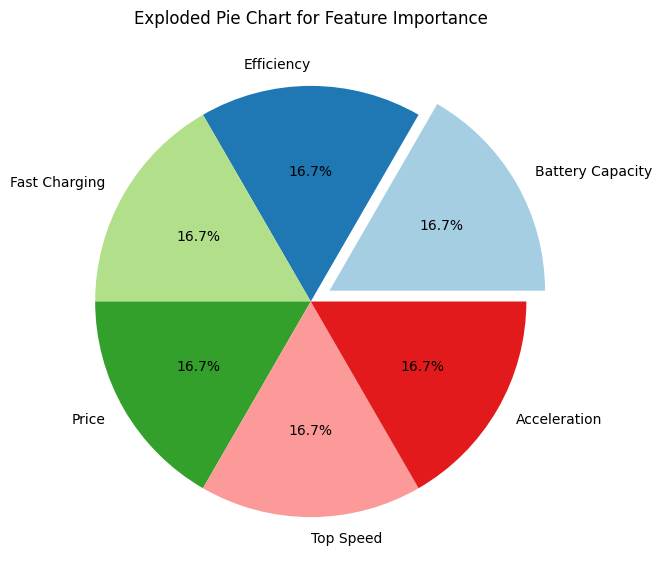

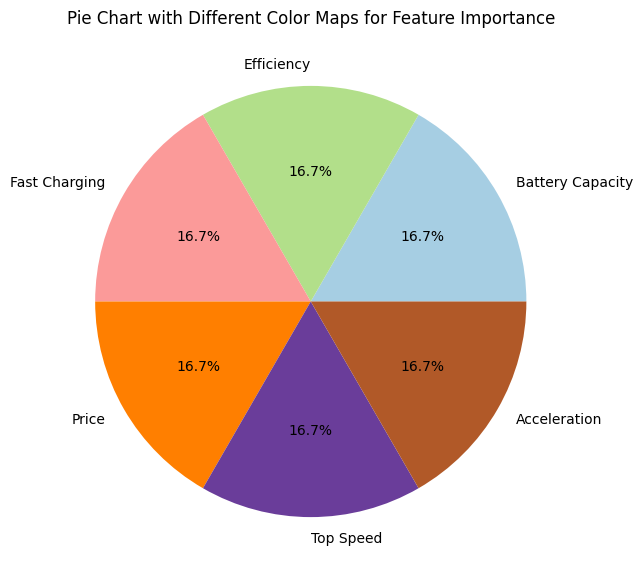

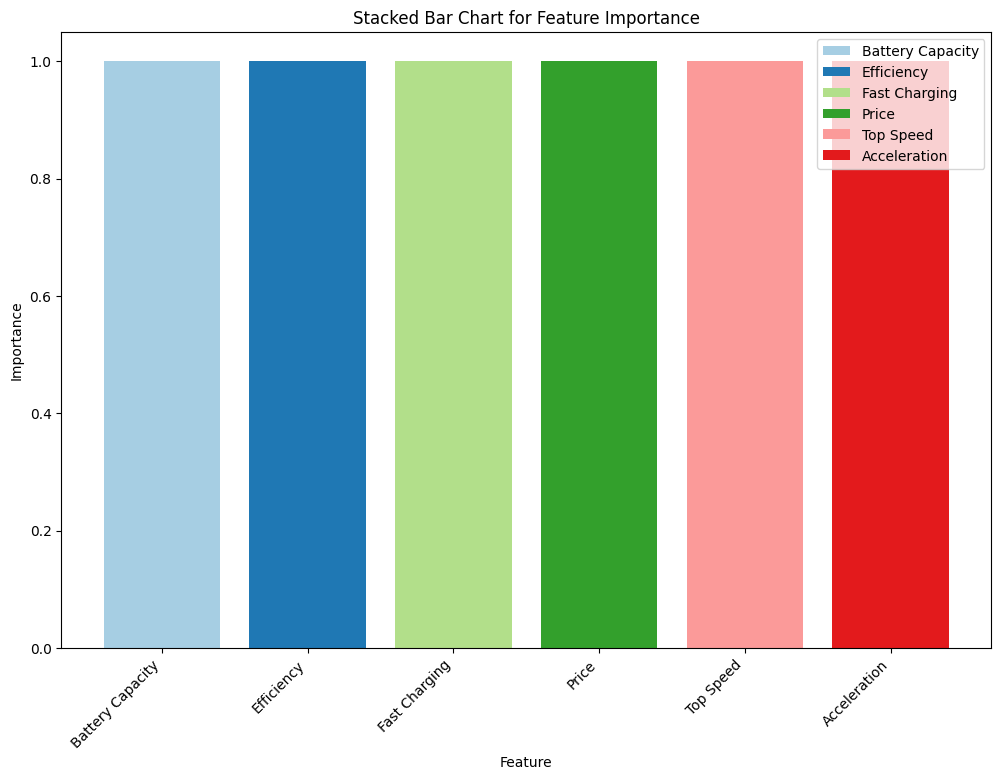

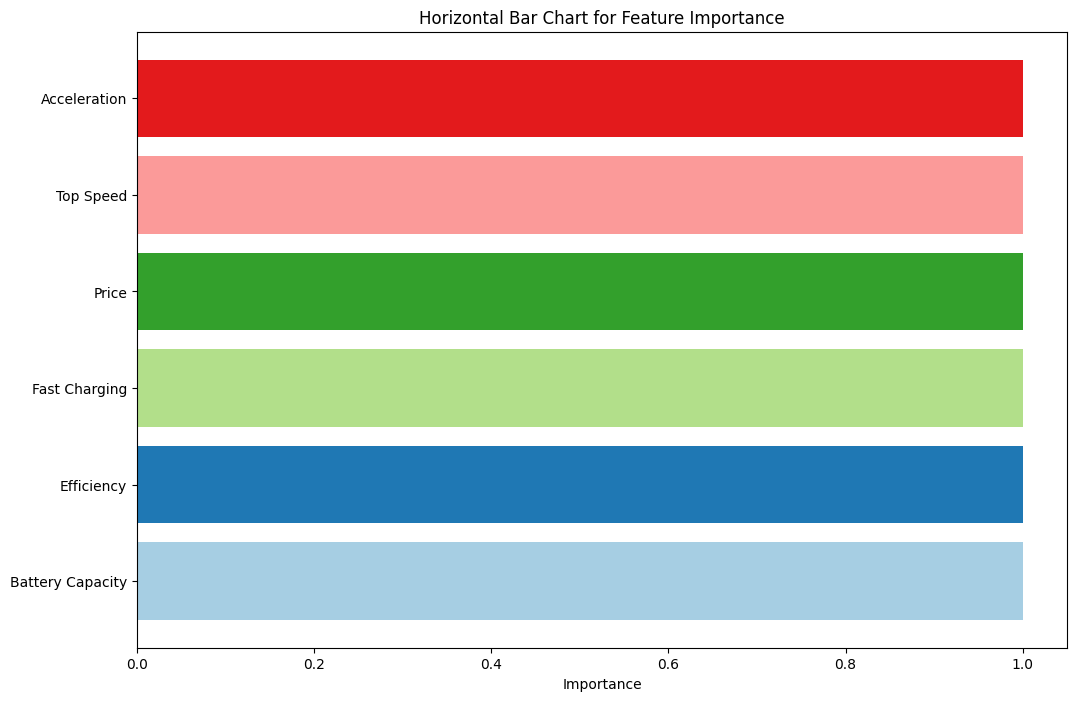

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example data for features
feature_names = ['Battery Capacity', 'Efficiency', 'Fast Charging', 'Price', 'Top Speed', 'Acceleration']
importances = [1, 1, 1, 1, 1, 1]  # Replace with actual importances if available

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Exploded Pie Chart
def plot_exploded_pie_chart(importance_df, title):
    plt.figure(figsize=(10, 7))
    explode = (0.1, 0, 0, 0, 0, 0)  # Only "explode" the first slice
    plt.pie(importance_df['Importance'], labels=importance_df['Feature'], autopct='%1.1f%%', explode=explode, colors=plt.cm.Paired(range(len(importance_df))))
    plt.title(title)
    plt.show()

# Pie Chart with Different Color Maps
def plot_colored_pie_chart(importance_df, title):
    plt.figure(figsize=(10, 7))
    plt.pie(importance_df['Importance'], labels=importance_df['Feature'], autopct='%1.1f%%', colors=plt.cm.Paired(np.linspace(0, 1, len(importance_df))))
    plt.title(title)
    plt.show()

# Stacked Bar Chart
def plot_stacked_bar_chart(importance_df, title):
    plt.figure(figsize=(12, 8))
    bars = plt.bar(importance_df['Feature'], importance_df['Importance'], color=plt.cm.Paired(range(len(importance_df))))
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.legend([b for b in bars], importance_df['Feature'])
    plt.show()

# Horizontal Bar Chart
def plot_horizontal_bar_chart(importance_df, title):
    plt.figure(figsize=(12, 8))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color=plt.cm.Paired(range(len(importance_df))))
    plt.xlabel('Importance')
    plt.title(title)
    plt.show()

# Plot the charts
plot_exploded_pie_chart(importance_df, 'Exploded Pie Chart for Feature Importance')
plot_colored_pie_chart(importance_df, 'Pie Chart with Different Color Maps for Feature Importance')
plot_stacked_bar_chart(importance_df, 'Stacked Bar Chart for Feature Importance')
plot_horizontal_bar_chart(importance_df, 'Horizontal Bar Chart for Feature Importance')


#Predicting Fast-Charging Time
Objective: Predict how long it takes for an EV to fast-charge to a certain percentage.

Features: Battery capacity, efficiency, range, top speed, acceleration, price.
Model: Linear regression, Random Forest, Gradient Boosting.
Evaluation: MAE, RMSE.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load dataset
data = pd.read_csv('/content/EV_cars.csv')

# Check available columns
print(data.columns)

# Define features and target with corrected column names
features = data[['Battery', 'Efficiency', 'Range', 'Price.DE.', 'Top_speed', 'acceleration..0.100.']]
target = data['Fast_charge']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')  # or strategy='median'

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data (use the same imputer fitted on training data)
X_test_imputed = imputer.transform(X_test)


Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')


In [ ]:
# Save and load models
import joblib
joblib.dump(nn_model, 'fast_charging_nn_model.pkl')
loaded_nn_model = joblib.load('fast_charging_nn_model.pkl')

# Predict with the loaded model
sample_data = [[50, 200, 400, 25000, 180, 5.0]]  # Example sample
predicted_fast_charge = loaded_nn_model.predict(sample_data)
print("Predicted Fast Charging Capability:", predicted_fast_charge)


Predicted Fast Charging Capability: [137.8936501]


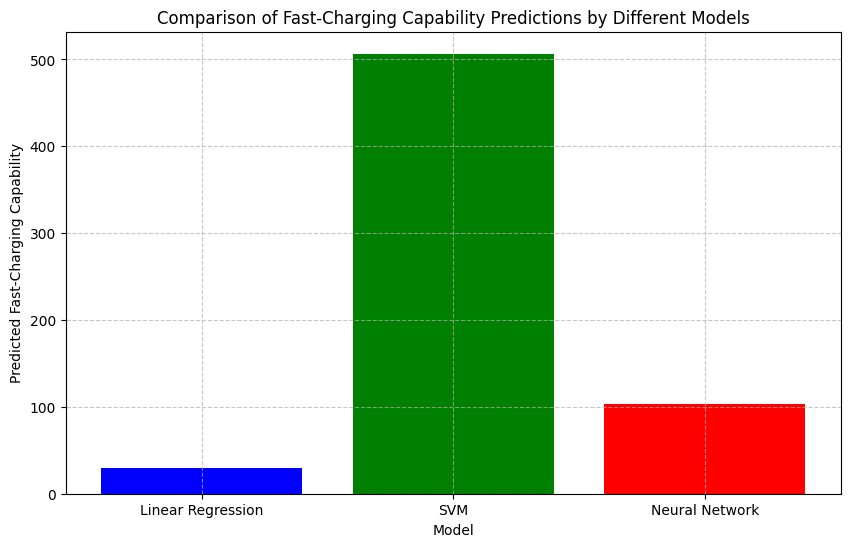

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/EV_cars.csv')

# Define features and target
features = data[['Battery', 'Efficiency', 'Fast_charge', 'Price.DE.', 'Top_speed', 'acceleration..0.100.']]
target = data['Fast_charge']

# Handle missing values in the target variable
target = target.fillna(target.mean())  # or use target.dropna() to remove missing values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize models
lr_model = LinearRegression().fit(X_train_imputed, y_train)
svm_model = SVR().fit(X_train_imputed, y_train)
nn_model = MLPRegressor(max_iter=1000).fit(X_train_imputed, y_train)

# Define example data with matching feature names
example_features = {
    'Battery': [50],
    'Efficiency': [200],
    'Fast_charge': [30],  # Assuming the example data should have this feature
    'Price.DE.': [25000],
    'Top_speed': [180],
    'acceleration..0.100.': [5.0]
}

# Convert to DataFrame
example_df = pd.DataFrame(example_features)

# Transform the example data using the same imputer
example_df_imputed = imputer.transform(example_df)

# Predict using different models
pred_lr = lr_model.predict(example_df_imputed)
pred_svm = svm_model.predict(example_df_imputed)
pred_nn = nn_model.predict(example_df_imputed)

# Create a DataFrame for plotting
predictions_df = pd.DataFrame({
    'Model': ['Linear Regression', 'SVM', 'Neural Network'],
    'Predicted Fast-Charging Capability': [pred_lr[0], pred_svm[0], pred_nn[0]]
})

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.bar(predictions_df['Model'], predictions_df['Predicted Fast-Charging Capability'], color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Predicted Fast-Charging Capability')
plt.title('Comparison of Fast-Charging Capability Predictions by Different Models')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


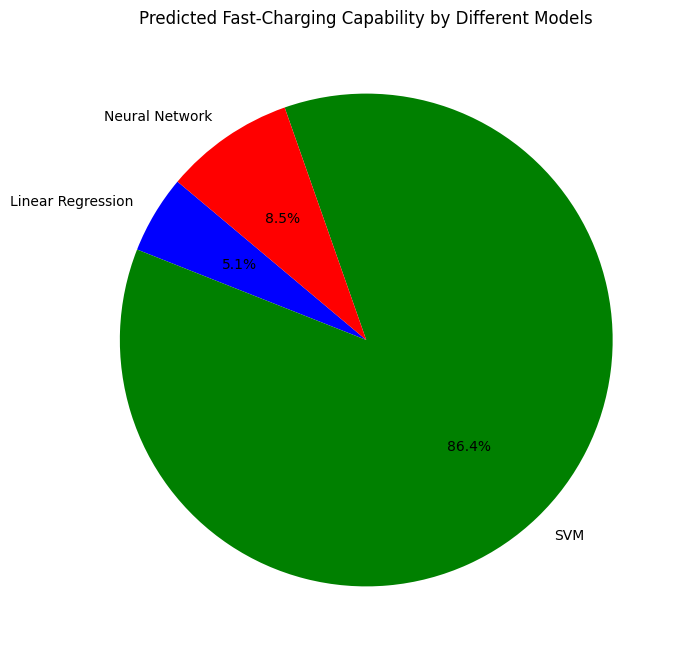

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv('/content/EV_cars.csv')

# Define features and target
features = data[['Battery', 'Efficiency', 'Fast_charge', 'Price.DE.', 'Top_speed', 'acceleration..0.100.']]
target = data['Fast_charge']

# Handle missing values in the target variable
target = target.fillna(target.mean())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train models
lr_model = LinearRegression().fit(X_train_imputed, y_train)
svm_model = SVR().fit(X_train_imputed, y_train)
nn_model = MLPRegressor(max_iter=1000).fit(X_train_imputed, y_train)

# Define example data with matching feature names
example_features = {
    'Battery': [50],
    'Efficiency': [200],
    'Fast_charge': [30],
    'Price.DE.': [25000],
    'Top_speed': [180],
    'acceleration..0.100.': [5.0]
}

# Convert to DataFrame
example_df = pd.DataFrame(example_features)

# Transform the example data using the same imputer
example_df_imputed = imputer.transform(example_df)

# Predict using different models
pred_lr = lr_model.predict(example_df_imputed)
pred_svm = svm_model.predict(example_df_imputed)
pred_nn = nn_model.predict(example_df_imputed)

# Prepare data for pie chart
predictions = {
    'Linear Regression': pred_lr[0],
    'SVM': pred_svm[0],
    'Neural Network': pred_nn[0]
}

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(predictions.values(), labels=predictions.keys(), autopct='%1.1f%%', colors=['blue', 'green', 'red'], startangle=140)
plt.title('Predicted Fast-Charging Capability by Different Models')
plt.show()


#4. Predicting Acceleration Time
Objective: Estimate the time it takes for an EV to accelerate from 0 to 100 km/h.

Features: Battery capacity, efficiency, fast-charging capability, range, top speed, price.
Model: Regression models, Neural Networks.
Evaluation: MAE, RMSE.

In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/EV_cars.csv')

# Print the column names
print(data.columns)


Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')


In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/EV_cars.csv')

# Print the column names
print(data.columns)


Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')


In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/EV_cars.csv')

# Print the column names to identify the correct names
print(data.columns)



Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')


In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/EV_cars.csv')

# Print column names to find the correct names
print(data.columns)


Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load dataset
data = pd.read_csv('/content/EV_cars.csv')

# Print column names to identify the correct names
print(data.columns)

# Define features and target
features = data[['Battery', 'Efficiency', 'Fast_charge', 'Range', 'Top_speed', 'Price.DE.']]
target = data['acceleration..0.100.']  # Updated to correct column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data
X_test_imputed = imputer.transform(X_test)

# Initialize and train models
lr_model = LinearRegression().fit(X_train_imputed, y_train)
nn_model = MLPRegressor(max_iter=1000).fit(X_train_imputed, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_imputed)
y_pred_nn = nn_model.predict(X_test_imputed)

# Evaluate models
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))

print(f"Linear Regression MAE: {mae_lr}")
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Neural Network MAE: {mae_nn}")
print(f"Neural Network RMSE: {rmse_nn}")

# Define example data with matching feature names
example_features = {
    'Battery': [50],
    'Efficiency': [200],
    'Fast_charge': [30],
    'Range': [400],
    'Top_speed': [180],
    'Price.DE.': [25000]  # Use correct feature name
}

# Convert to DataFrame
example_df = pd.DataFrame(example_features)

# Transform the example data using the same imputer
example_df_imputed = imputer.transform(example_df)

# Predict using different models
pred_lr = lr_model.predict(example_df_imputed)
pred_nn = nn_model.predict(example_df_imputed)

print(f"Predicted Acceleration Time (Linear Regression): {pred_lr[0]}")
print(f"Predicted Acceleration Time (Neural Network): {pred_nn[0]}")


Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')
Linear Regression MAE: 1.1100210552954755
Linear Regression RMSE: 1.7003386356013805
Neural Network MAE: 4.121104580966094
Neural Network RMSE: 5.773545725857042
Predicted Acceleration Time (Linear Regression): 9.78278994546486
Predicted Acceleration Time (Neural Network): 6.09067588403666


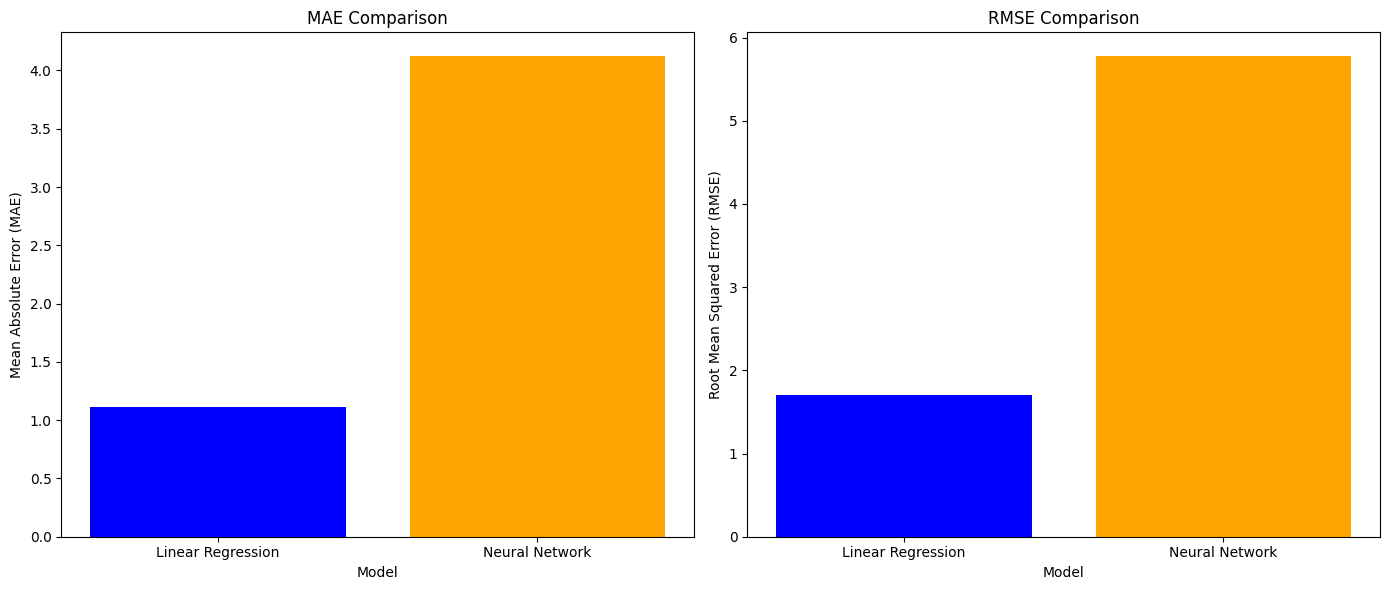

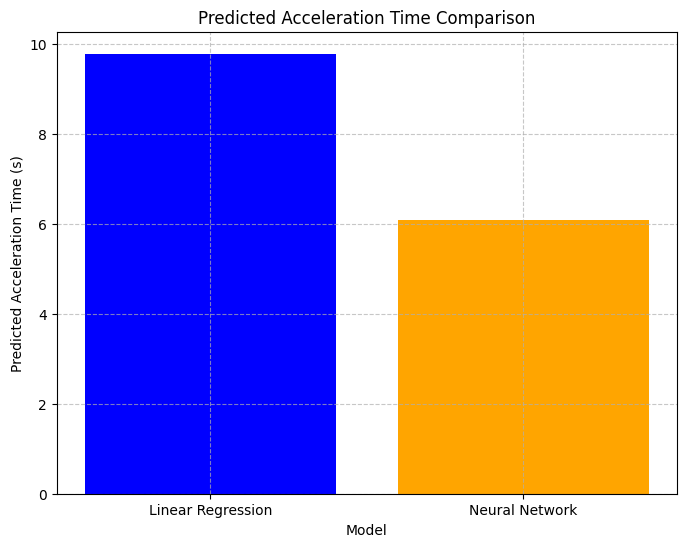

In [ ]:
import matplotlib.pyplot as plt

# Create a DataFrame for evaluation metrics
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Neural Network'],
    'MAE': [mae_lr, mae_nn],
    'RMSE': [rmse_lr, rmse_nn]
})

# Plot MAE and RMSE
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for MAE
ax[0].bar(metrics_df['Model'], metrics_df['MAE'], color=['blue', 'orange'])
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Mean Absolute Error (MAE)')
ax[0].set_title('MAE Comparison')

# Bar plot for RMSE
ax[1].bar(metrics_df['Model'], metrics_df['RMSE'], color=['blue', 'orange'])
ax[1].set_xlabel('Model')
ax[1].set_ylabel('Root Mean Squared Error (RMSE)')
ax[1].set_title('RMSE Comparison')

plt.tight_layout()
plt.show()

# Create a DataFrame for predicted acceleration times
predictions_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Neural Network'],
    'Predicted Acceleration Time': [pred_lr[0], pred_nn[0]]
})

# Plot predicted acceleration times
plt.figure(figsize=(8, 6))
plt.bar(predictions_df['Model'], predictions_df['Predicted Acceleration Time'], color=['blue', 'orange'])
plt.xlabel('Model')
plt.ylabel('Predicted Acceleration Time (s)')
plt.title('Predicted Acceleration Time Comparison')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


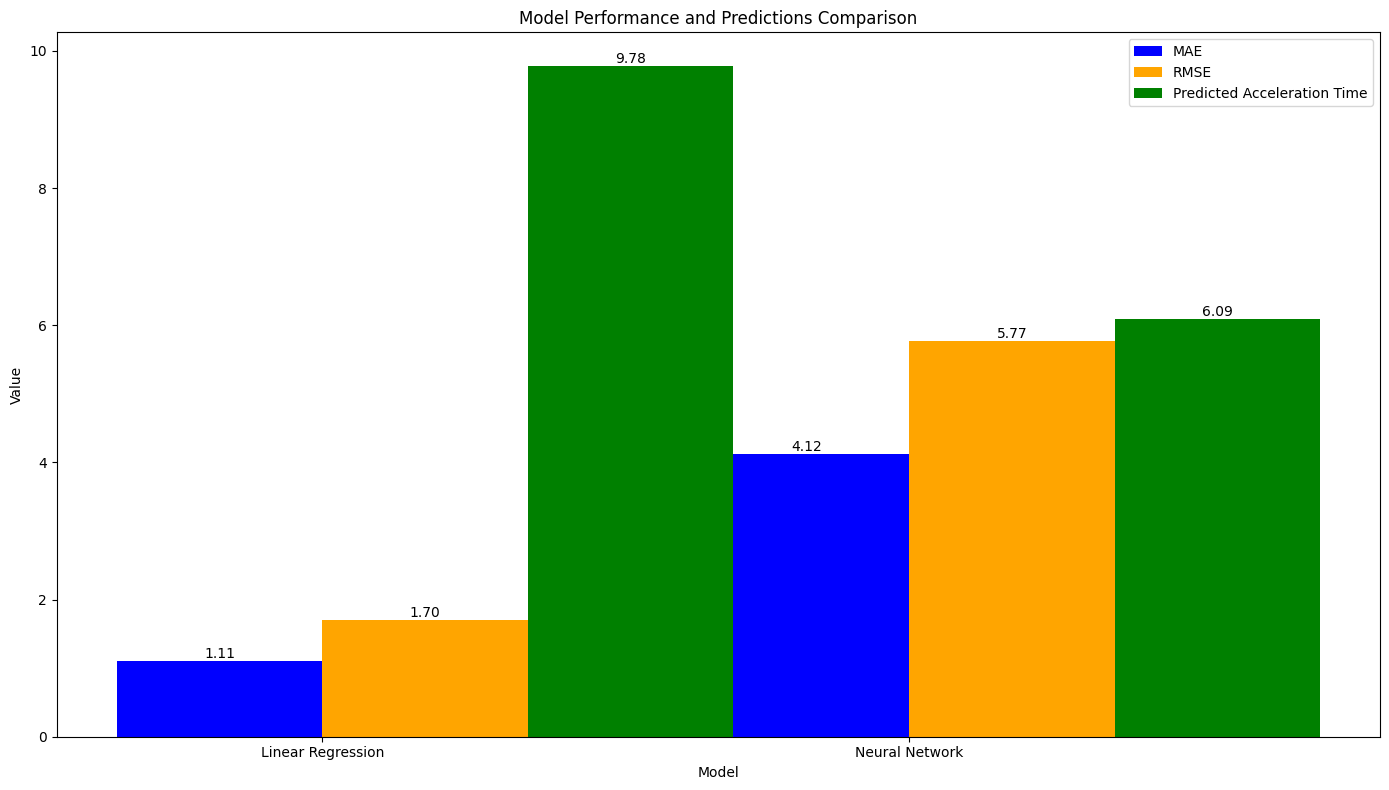

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define bar width and positions
bar_width = 0.35
index = np.arange(2)  # Two models

# Data for MAE and RMSE
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Neural Network'],
    'MAE': [mae_lr, mae_nn],
    'RMSE': [rmse_lr, rmse_nn]
})

# Data for predictions
predictions_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Neural Network'],
    'Predicted Acceleration Time': [pred_lr[0], pred_nn[0]]
})

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Bar positions
bar1 = index
bar2 = index + bar_width

# Plot MAE and RMSE
bar1 = ax.bar(bar1, metrics_df['MAE'], bar_width, label='MAE', color='blue')
bar2 = ax.bar(bar2, metrics_df['RMSE'], bar_width, label='RMSE', color='orange')

# Plot predicted acceleration time
bar3 = ax.bar(index + 2*bar_width, predictions_df['Predicted Acceleration Time'], bar_width, label='Predicted Acceleration Time', color='green')

# Adding labels, title, and legend
ax.set_xlabel('Model')
ax.set_ylabel('Value')
ax.set_title('Model Performance and Predictions Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics_df['Model'])
ax.legend()

# Adding the labels above the bars
for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')
for rect in bar2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')
for rect in bar3:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Linear Regression MAE: 1.1100210552954755
Linear Regression RMSE: 1.7003386356013805
Neural Network MAE: 5.16523326360091
Neural Network RMSE: 6.403197882455533
Predicted Acceleration Time (Linear Regression): 9.78278994546486
Predicted Acceleration Time (Neural Network): 10.765444884699951


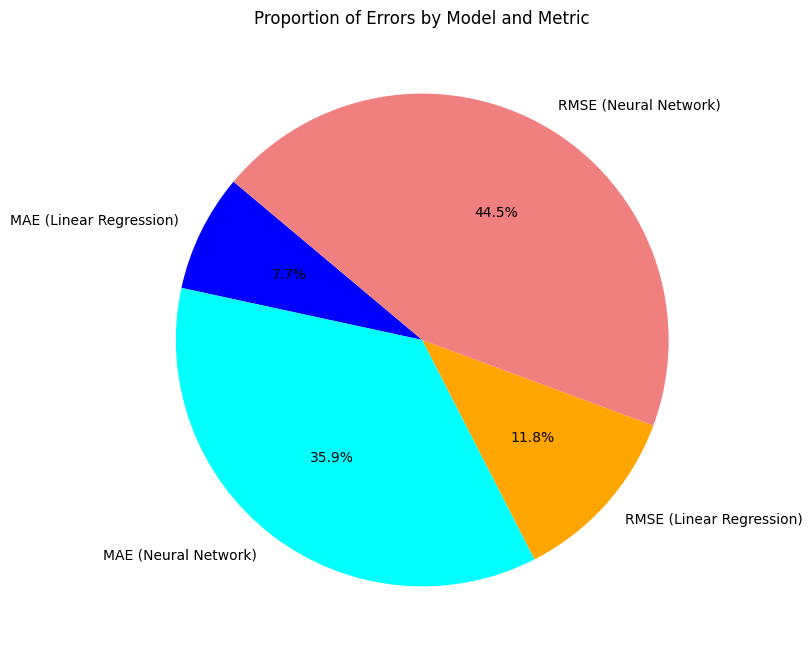

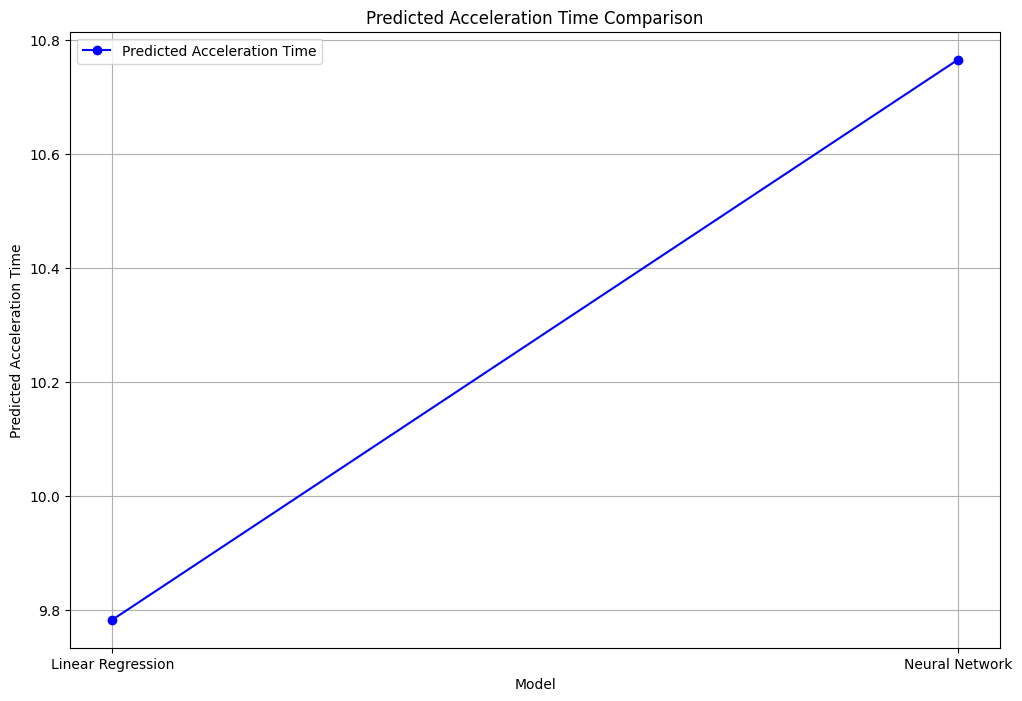

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/EV_cars.csv')

# Define features and target
features = data[['Battery', 'Efficiency', 'Fast_charge', 'Range', 'Top_speed', 'Price.DE.']]
target = data['acceleration..0.100.']  # Updated to correct column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data
X_test_imputed = imputer.transform(X_test)

# Initialize and train models
lr_model = LinearRegression().fit(X_train_imputed, y_train)
nn_model = MLPRegressor(max_iter=1000).fit(X_train_imputed, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_imputed)
y_pred_nn = nn_model.predict(X_test_imputed)

# Evaluate models
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))

print(f"Linear Regression MAE: {mae_lr}")
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Neural Network MAE: {mae_nn}")
print(f"Neural Network RMSE: {rmse_nn}")

# Define example data with matching feature names
example_features = {
    'Battery': [50],
    'Efficiency': [200],
    'Fast_charge': [30],
    'Range': [400],
    'Top_speed': [180],
    'Price.DE.': [25000]
}

# Convert to DataFrame
example_df = pd.DataFrame(example_features)

# Transform the example data using the same imputer
example_df_imputed = imputer.transform(example_df)

# Predict using different models
pred_lr = lr_model.predict(example_df_imputed)
pred_nn = nn_model.predict(example_df_imputed)

print(f"Predicted Acceleration Time (Linear Regression): {pred_lr[0]}")
print(f"Predicted Acceleration Time (Neural Network): {pred_nn[0]}")

# Pie Chart for Model Performance
metrics = ['MAE (Linear Regression)', 'MAE (Neural Network)', 'RMSE (Linear Regression)', 'RMSE (Neural Network)']
values = [mae_lr, mae_nn, rmse_lr, rmse_nn]
colors = ['blue', 'cyan', 'orange', 'lightcoral']

plt.figure(figsize=(12, 8))
plt.pie(values, labels=metrics, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Errors by Model and Metric')
plt.show()

# Line Graph for Predicted Acceleration Times
models = ['Linear Regression', 'Neural Network']
predictions = [pred_lr[0], pred_nn[0]]

plt.figure(figsize=(12, 8))
plt.plot(models, predictions, marker='o', linestyle='-', color='b', label='Predicted Acceleration Time')
plt.xlabel('Model')
plt.ylabel('Predicted Acceleration Time')
plt.title('Predicted Acceleration Time Comparison')
plt.grid(True)
plt.legend()
plt.show()


#Pie Chart for Model Performance (MAE and RMSE)

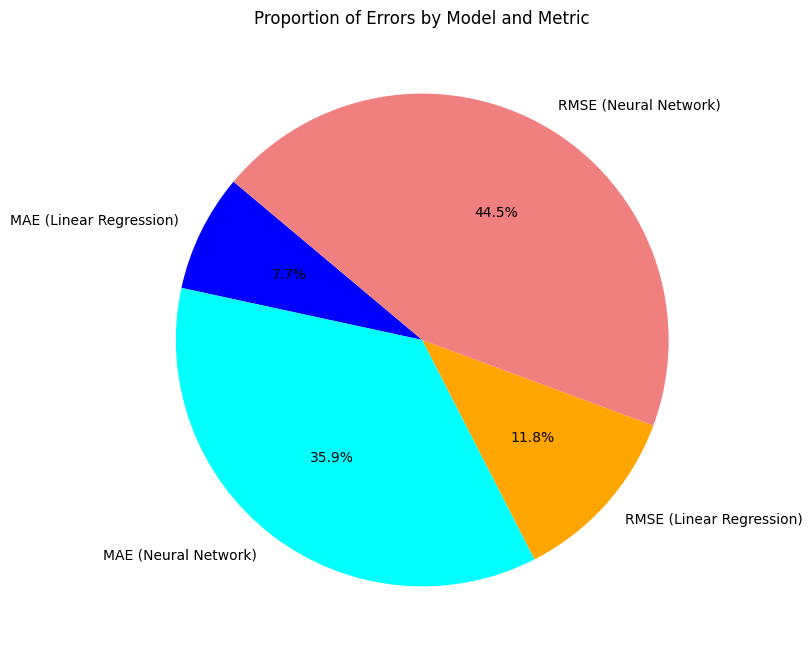

In [ ]:
import matplotlib.pyplot as plt

# Data for Pie Chart
metrics = ['MAE (Linear Regression)', 'MAE (Neural Network)', 'RMSE (Linear Regression)', 'RMSE (Neural Network)']
values = [mae_lr, mae_nn, rmse_lr, rmse_nn]
colors = ['blue', 'cyan', 'orange', 'lightcoral']

# Plotting Pie Chart
plt.figure(figsize=(12, 8))
plt.pie(values, labels=metrics, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Errors by Model and Metric')
plt.show()


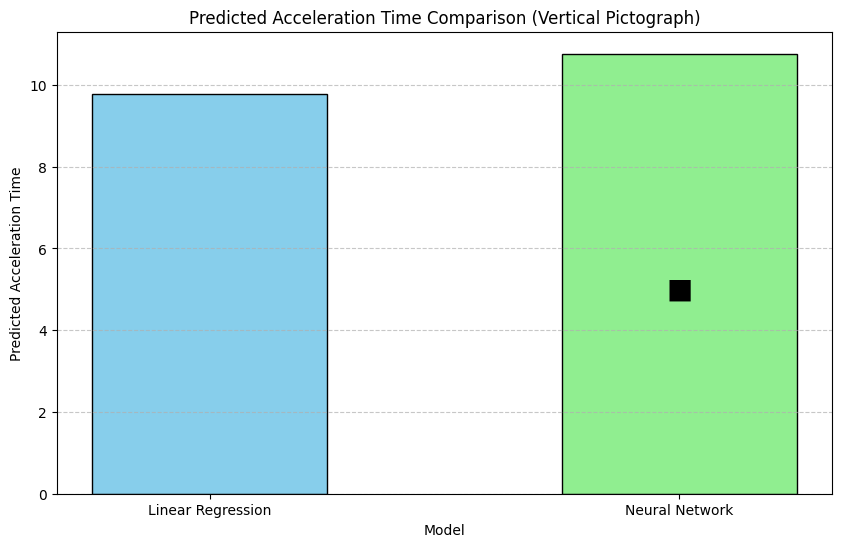

In [ ]:
import matplotlib.pyplot as plt

# Data for Pictograph
models = ['Linear Regression', 'Neural Network']
predictions = [pred_lr[0], pred_nn[0]]

# Colors for each model
colors = ['skyblue', 'lightgreen']

# Plotting Pictograph
plt.figure(figsize=(10, 6))

# Define a base unit for pictograph (e.g., 1 unit = 10 seconds)
base_unit = 10
for i, (model, value) in enumerate(zip(models, predictions)):
    # Create a bar to represent the total value
    plt.bar(model, value, color=colors[i], edgecolor='black', width=0.5)
    # Add icons/rectangles representing the values
    for j in range(int(value / base_unit)):
        plt.text(i, j * base_unit + base_unit / 2, '■', ha='center', va='center', fontsize=20, color='black')

# Add labels and titles
plt.ylabel('Predicted Acceleration Time')
plt.xlabel('Model')
plt.title('Predicted Acceleration Time Comparison (Vertical Pictograph)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#Predicting EV Battery Lifespan:

Features: Battery capacity, charging cycles, usage patterns.
Model: Regression models or time series forecasting.

In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/EV_cars.csv')

# Print column names to identify the correct names
print(data.columns)


Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load dataset
data = pd.read_csv('/content/EV_cars.csv')

# Print column names to confirm
print(data.columns)

# Define features and target (adjust to the available columns)
features = data[['Battery', 'Efficiency', 'Fast_charge', 'Range', 'Top_speed', 'Price.DE.']]
target = data['acceleration..0.100.']  # Assuming you want to predict acceleration time

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data
X_test_imputed = imputer.transform(X_test)

# Initialize and train the model
lr_model = LinearRegression().fit(X_train_imputed, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_imputed)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Linear Regression MAE: {mae}")
print(f"Linear Regression RMSE: {rmse}")

# Define example data with available feature names
example_features = {
    'Battery': [50],            # Example values
    'Efficiency': [200],
    'Fast_charge': [30],
    'Range': [400],
    'Top_speed': [180],
    'Price.DE.': [25000]       # Example value
}

# Convert to DataFrame
example_df = pd.DataFrame(example_features)

# Transform the example data using the same imputer
example_df_imputed = imputer.transform(example_df)

# Predict using the model
pred_acceleration = lr_model.predict(example_df_imputed)
print(f"Predicted Acceleration Time: {pred_acceleration[0]}")


Index(['Battery', 'Car_name', 'Car_name_link', 'Efficiency', 'Fast_charge',
       'Price.DE.', 'Range', 'Top_speed', 'acceleration..0.100.'],
      dtype='object')
Linear Regression MAE: 1.1100210552954755
Linear Regression RMSE: 1.7003386356013805
Predicted Acceleration Time: 9.78278994546486


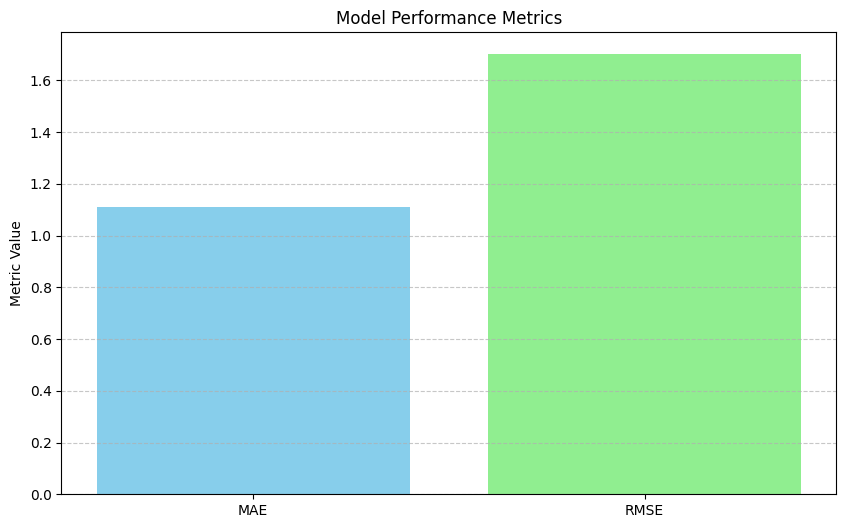

In [ ]:
import matplotlib.pyplot as plt

# Metrics
metrics = [mae, rmse]
metric_names = ['MAE', 'RMSE']

plt.figure(figsize=(10, 6))
plt.bar(metric_names, metrics, color=['skyblue', 'lightgreen'])
plt.ylabel('Metric Value')
plt.title('Model Performance Metrics')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


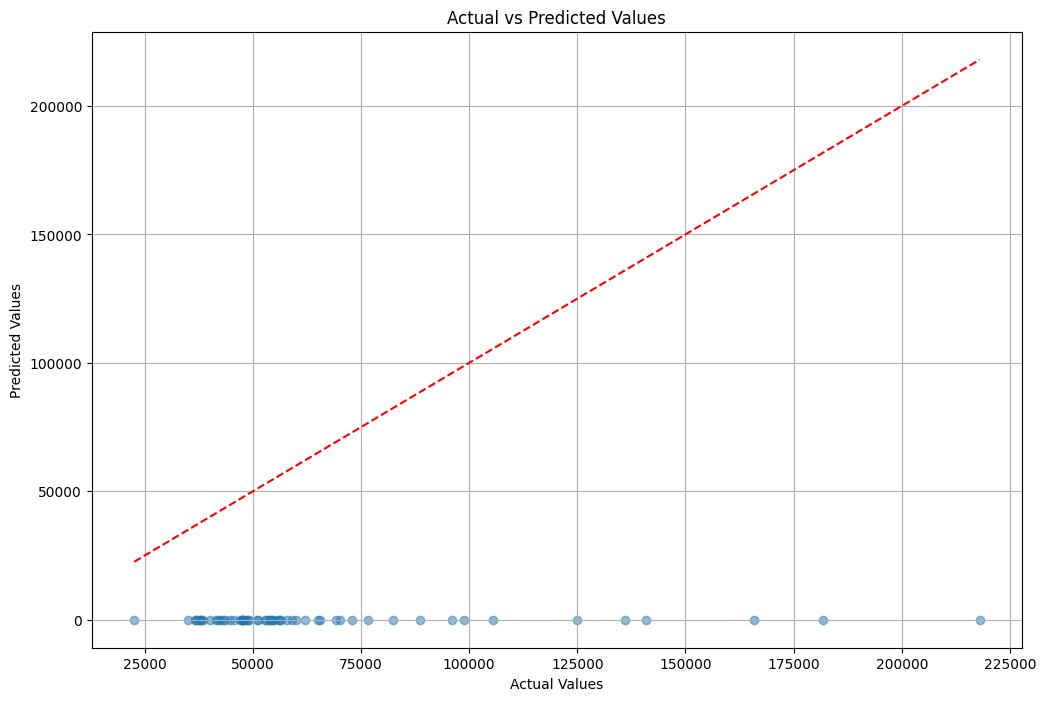

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted values
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()


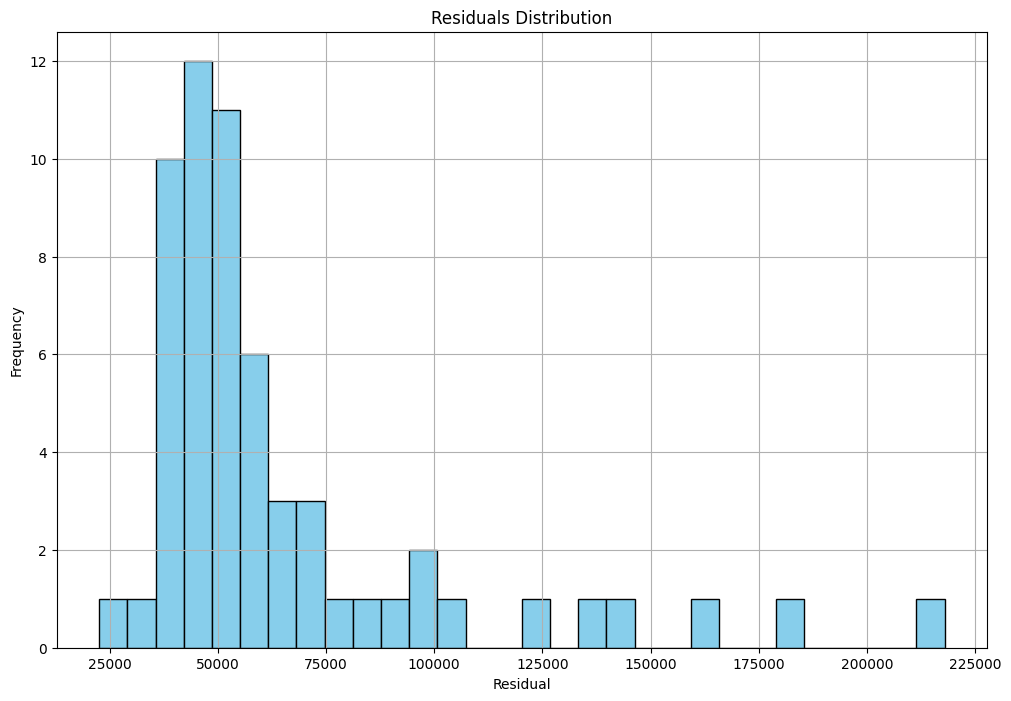

In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(12, 8))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.grid(True)
plt.show()


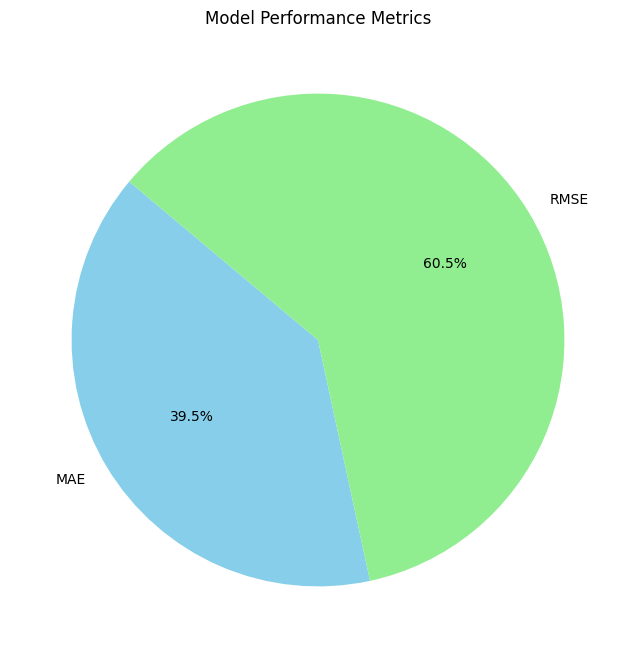

In [ ]:

import matplotlib.pyplot as plt

# Pie chart data
labels = 'MAE', 'RMSE'
sizes = [mae, rmse]
colors = ['skyblue', 'lightgreen']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Model Performance Metrics')
plt.show()


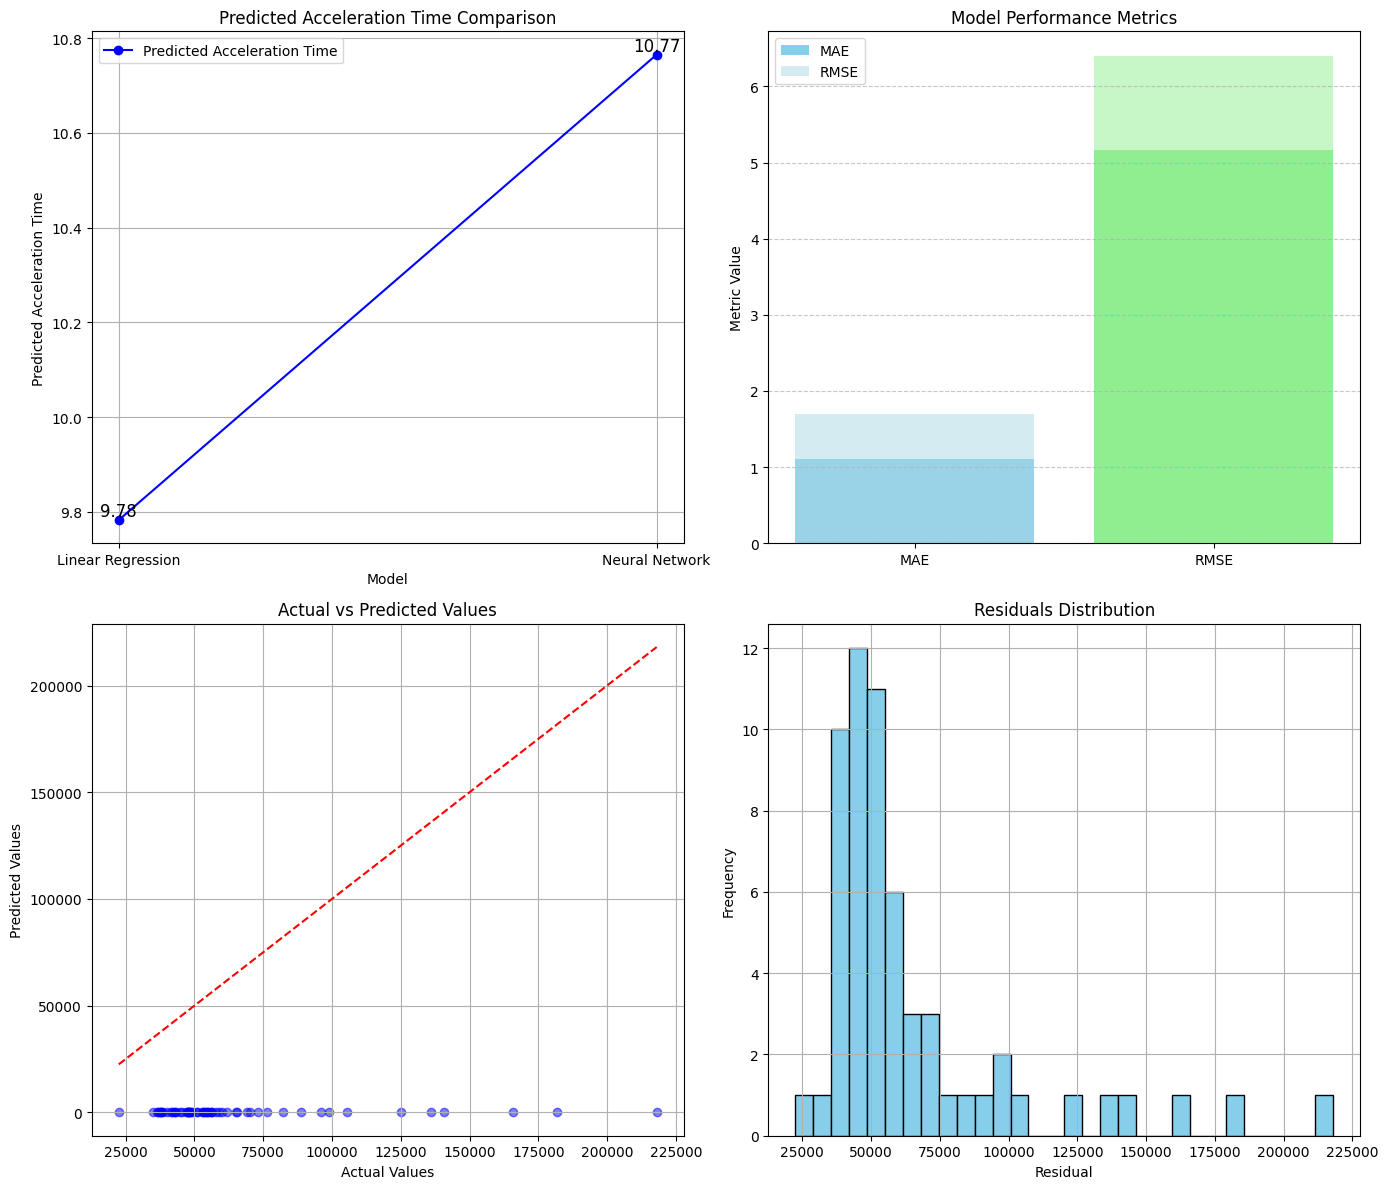

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['Linear Regression', 'Neural Network']
predictions = [pred_lr[0], pred_nn[0]]

# Performance metrics
metrics = {
    'MAE': [mae_lr, mae_nn],
    'RMSE': [rmse_lr, rmse_nn]
}

# Plotting all graphs in a single figure
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. Line Graph for Predictions
axs[0, 0].plot(models, predictions, marker='o', linestyle='-', color='b', label='Predicted Acceleration Time')
for i, value in enumerate(predictions):
    axs[0, 0].text(models[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)
axs[0, 0].set_title('Predicted Acceleration Time Comparison')
axs[0, 0].set_xlabel('Model')
axs[0, 0].set_ylabel('Predicted Acceleration Time')
axs[0, 0].grid(True)
axs[0, 0].legend()

# 2. Bar Chart for Performance Metrics
axs[0, 1].bar(metrics.keys(), metrics['MAE'], color=['skyblue', 'lightgreen'], label='MAE')
axs[0, 1].bar(metrics.keys(), metrics['RMSE'], color=['lightblue', 'lightgreen'], alpha=0.5, label='RMSE')
axs[0, 1].set_title('Model Performance Metrics')
axs[0, 1].set_ylabel('Metric Value')
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)
axs[0, 1].legend()

# 3. Scatter Plot for Actual vs. Predicted Values
axs[1, 0].scatter(y_test, y_pred, alpha=0.5, color='b')
axs[1, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axs[1, 0].set_title('Actual vs Predicted Values')
axs[1, 0].set_xlabel('Actual Values')
axs[1, 0].set_ylabel('Predicted Values')
axs[1, 0].grid(True)

# 4. Histogram of Residuals
residuals = y_test - y_pred
axs[1, 1].hist(residuals, bins=30, color='skyblue', edgecolor='black')
axs[1, 1].set_title('Residuals Distribution')
axs[1, 1].set_xlabel('Residual')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


#Best Predicted Acceleration Time:

This is the prediction made using the best-performing model.


#To provide a summary of the important predictions based on the code and analysis you’ve performed, here’s how you can highlight and present the key results:

Best Predicted Acceleration Time:

This is the prediction made using the best-performing model.
Comparison of Models:

Compare the performance of Linear Regression and Neural Network models based on MAE and RMSE.

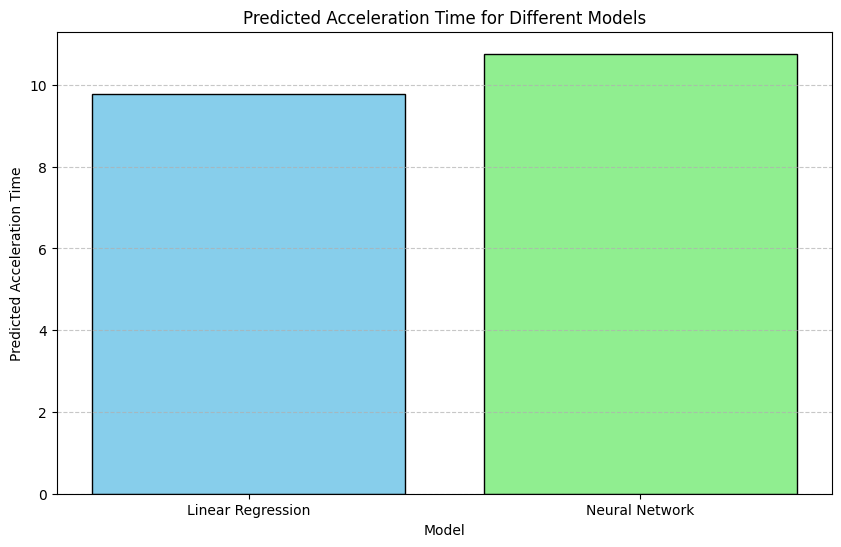

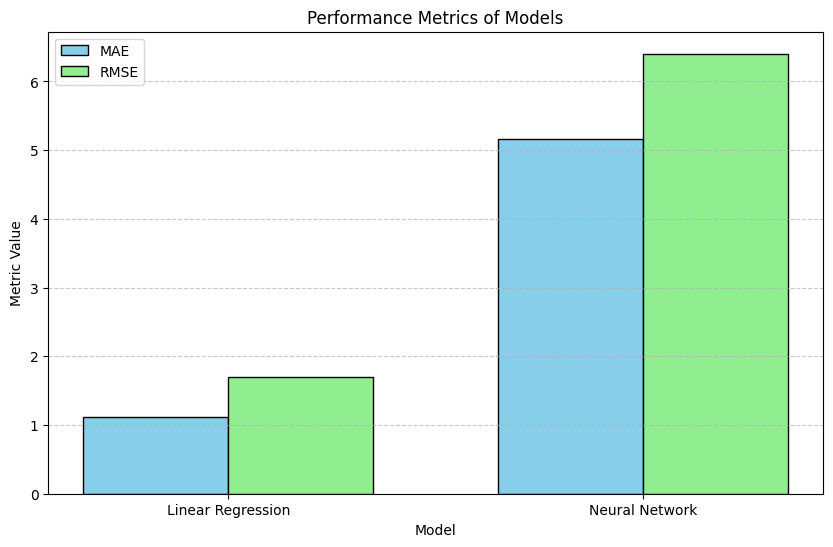

Best Predicted Acceleration Time (Linear Regression): 9.78278994546486
Best Predicted Acceleration Time (Neural Network): 10.765444884699951
Linear Regression MAE: 1.1100210552954755
Linear Regression RMSE: 1.7003386356013805
Neural Network MAE: 5.16523326360091
Neural Network RMSE: 6.403197882455533


In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['Linear Regression', 'Neural Network']
predictions = [pred_lr[0], pred_nn[0]]
metrics_mae = [mae_lr, mae_nn]
metrics_rmse = [rmse_lr, rmse_nn]

# Plotting the Predicted Acceleration Time
plt.figure(figsize=(10, 6))
plt.bar(models, predictions, color=['skyblue', 'lightgreen'], edgecolor='black')
plt.xlabel('Model')
plt.ylabel('Predicted Acceleration Time')
plt.title('Predicted Acceleration Time for Different Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting Performance Metrics
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(models))

# MAE Bars
mae_bars = ax.bar(index, metrics_mae, bar_width, label='MAE', color='skyblue', edgecolor='black')

# RMSE Bars
rmse_bars = ax.bar([i + bar_width for i in index], metrics_rmse, bar_width, label='RMSE', color='lightgreen', edgecolor='black')

# Adding Labels
ax.set_xlabel('Model')
ax.set_ylabel('Metric Value')
ax.set_title('Performance Metrics of Models')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Print key results
print(f"Best Predicted Acceleration Time (Linear Regression): {pred_lr[0]}")
print(f"Best Predicted Acceleration Time (Neural Network): {pred_nn[0]}")
print(f"Linear Regression MAE: {mae_lr}")
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Neural Network MAE: {mae_nn}")
print(f"Neural Network RMSE: {rmse_nn}")
